In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from numba import njit
import itertools
import json

from src import *

100%|███████████████████████████████████████████████████████████████| 20/20 [33:37<00:00, 100.88s/it]


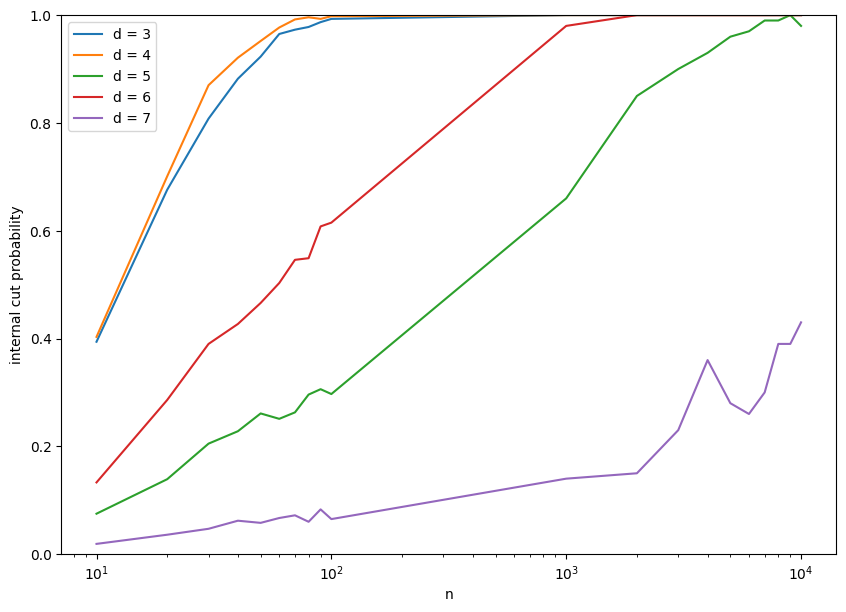

In [17]:
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
probas_3 = []
probas_4 = []
probas_5 = []
probas_6 = []
probas_7 = []

for size in tqdm(sizes):
    probas_3.append(measure_success_probability(3, size, 1000 if size < 1000 else 100))
    probas_4.append(measure_success_probability(4, size, 1000 if size < 1000 else 100))
    probas_5.append(measure_success_probability(5, size, 1000 if size < 1000 else 100))
    probas_6.append(measure_success_probability(6, size, 1000 if size < 1000 else 100))
    probas_7.append(measure_success_probability(7, size, 1000 if size < 1000 else 100))

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('n')
plt.ylabel('internal cut probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='d = 3')
plt.plot(sizes, probas_4, label='d = 4')
plt.plot(sizes, probas_5, label='d = 5')
plt.plot(sizes, probas_6, label='d = 6')
plt.plot(sizes, probas_7, label='d = 7')
plt.legend();
plt.savefig('internal_cut_proba.png')

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
plt.xscale('log')
plt.plot(sizes[:14], probas_3, label='d = 3')
plt.plot(sizes[:14], probas_4, label='d = 4')
plt.plot(sizes[:14], probas_5, label='d = 5')
plt.plot(sizes[:14], probas_6, label='d = 6')
plt.plot(sizes[:14], probas_7, label='d = 7')
plt.title('d-regular graphs')
plt.legend();
plt.savefig('success_probability_extended.png')

In [ ]:
#sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
sizes = np.arange(10, 101, 10).astype(int)

probas_01 = []
probas_05 = []
probas_09 = []
num_tests = 10000

for size in sizes:
    print(f'size: {size}')
    probas_01.append(measure_erdos_renyi(0.1, size, num_tests, silent=False))
    probas_05.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))
    probas_09.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))

print(sizes)
print(probas_01)
print(probas_05)
print(probas_09)

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
# plt.xscale('log')
plt.plot(sizes, probas_01, label='p = 0.1')
plt.plot(sizes, probas_05, label='p = 0.5')
plt.plot(sizes, probas_09, label='p = 0.9')
plt.title('Erdos-Renyi random graphs')
plt.legend();
plt.savefig('success_probability_erdos_renyi.png')

In [218]:
measure_success_probability(5, 10000, 100, silent=False)

i: 0, num_successes: 0


0.99

In [219]:
measure_success_probability(5, 1000, 100, silent=False)

i: 0, num_successes: 0


0.62

In [ ]:
d = 9
n = 30

for i in range(10000):
    if i % 100 == 0:
        print(i)
        
    graph = nx.random_regular_graph(d, n)
    if not found_partition(graph, 1000):
        print("possible counterexample:")
        nx.draw_networkx(graph, pos=nx.spring_layout(graph))
        plt.show()

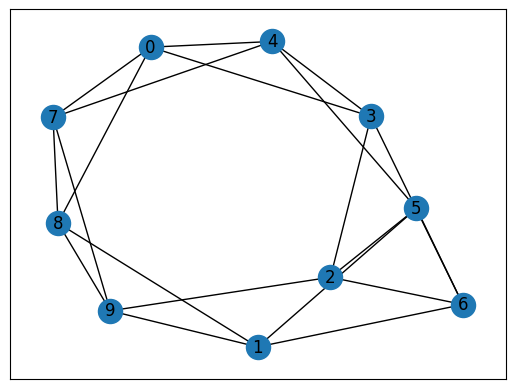

In [190]:
d = 4
n = 10
graph = nx.random_regular_graph(d, n)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [ ]:
res, graph = produce_counterexample(11, 28, iterations_thresh=10000, modifications_thresh=10000, silent=False)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

0
100


In [94]:
for i in range(10000):
    if i % 1000 == 0:
        print(i)
    
    res = swap_process(graph)
    if res:
        print(f'cut found at iter {i}')z
        break

0
1000
2000
cut found at iter 2045


In [204]:
def random_regular_bipartite(d, size):
    while True:
        # bip = nx.bipartite.configuration_model([d] * size, [d] * size, create_using=nx.Graph())
        graph = nx.bipartite.configuration_model([1] * size * d, [1] * size * d, create_using=nx.Graph())
        graph = nx.quotient_graph(graph, lambda a, b : (((a < size * d) == (b < size * d)) and abs(a - b) < d))
        if nx.is_regular(graph) and graph.degree(list(graph.nodes())[0]) == d:
            return graph

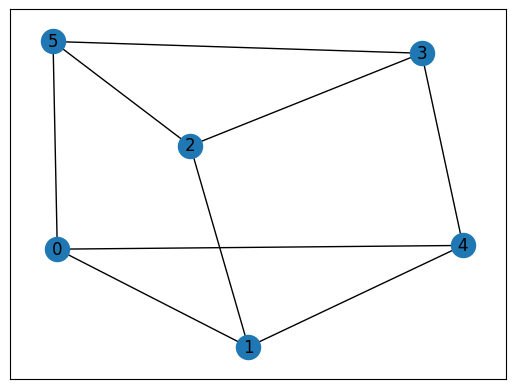

In [27]:
d = 3
num_vxs = 6

graph = nx.random_regular_graph(d, num_vxs)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [52]:
cut = np.random.choice([1, -1], size=num_vxs)
print(cut)
print(is_core_in_positive_part(graph, cut, return_core=True))

[-1  1  1  1 -1  1]
(True, array([-1, -1,  1,  1, -1,  1]))


100%|████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]


[  10   20   30   40   50   60   70   80   90  100  100  200  300  400
  500  600  700  800  900 1000]
[0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.6, 0.3, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0]
[0.4, 0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.6, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0]


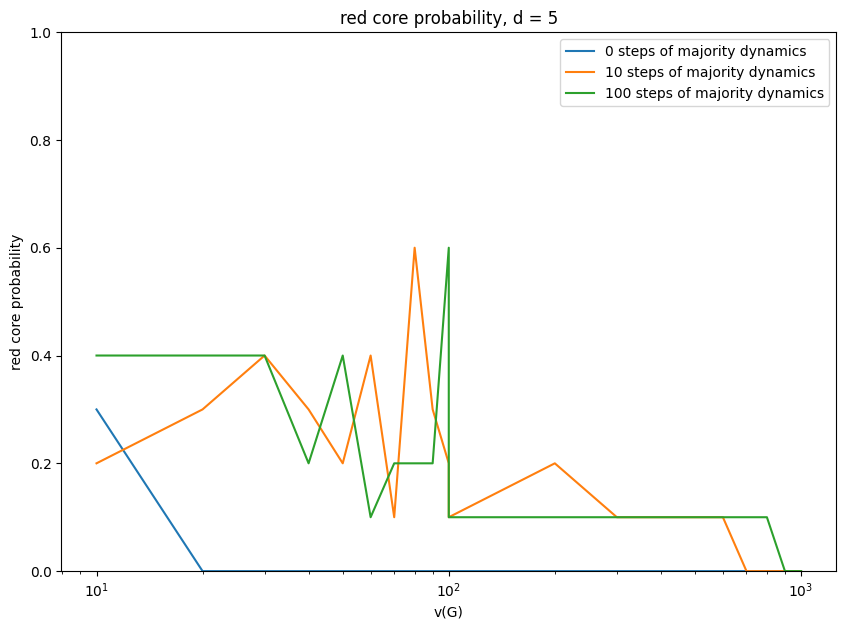

In [14]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 100)))

probas_0 = []
probas_10 = []
probas_100 = []
#probas_100 = []
num_tests = 10

for size in tqdm(sizes):
    probas_0.append(core_probability(d, size, 0, num_tests, silent=True))
    probas_10.append(core_probability(d, size, 10, num_tests, silent=True))
    probas_100.append(core_probability(d, size, 100, num_tests, silent=True))
    #probas_100.append(core_probability(d, size, 100, num_tests, silent=False))

print(sizes)
print(probas_0)
print(probas_10)
print(probas_100)
#print(probas_100)

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('red core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of majority dynamics')
plt.plot(sizes, probas_10, label='10 steps of majority dynamics')
plt.plot(sizes, probas_100, label='100 steps of majority dynamics')
#plt.plot(sizes, probas_100, label='100 steps of majority dynamics')
plt.title(f'red core probability, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_{d}.png')

In [17]:
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas = [[], [], [], [], []]
num_tests = 300

for size in tqdm(sizes):
    for d in range(3, 8):
        probas[d - 3].append(core_probability_final(d, size, num_tests))

100%|███████████████████████████████████████████████████████████████| 15/15 [54:11<00:00, 216.75s/it]


In [19]:
revisit_sizes = np.arange(10, 101, 10).astype(int)
num_tests = 700

for i, size in tqdm(enumerate(revisit_sizes)):
    for d in range(3, 8):
        probas[d - 3][i] = core_probability_final(d, size, num_tests) * 0.7 + probas[d - 3][i] * 0.3

10it [02:25, 14.58s/it]


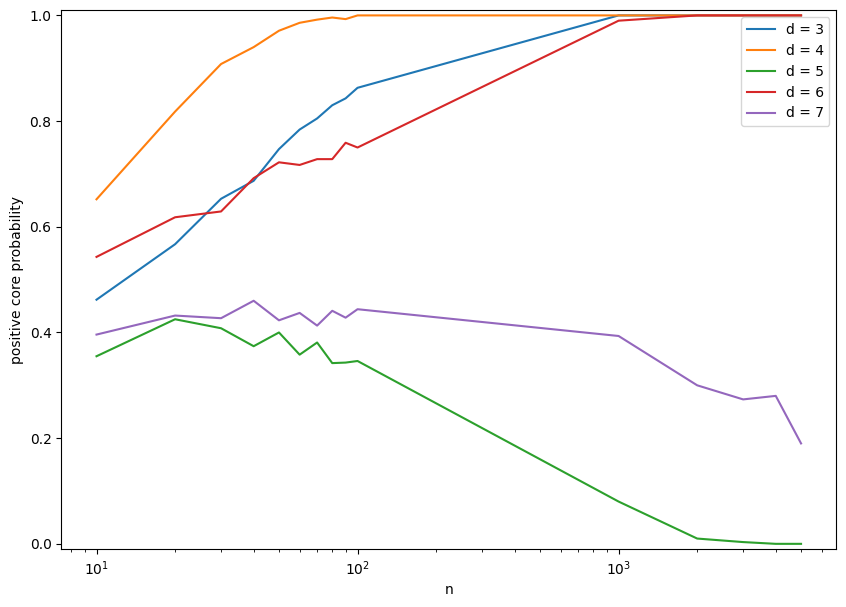

In [21]:
plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('n')
plt.ylabel('positive core probability')
plt.xscale('log')
for d in range(3, 8):
    plt.plot(sizes, probas[d - 3], label=f'd = {d}')
plt.legend();
plt.savefig(f'proba_positive_core_final.png')

100%|████████████████████████████████████████████████████████████████| 15/15 [00:45<00:00,  3.05s/it]


[  10   20   30   40   50   60   70   80   90  100 1000 2000 3000 4000
 5000]
[0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.6, 0.6, 0.6, 0.7, 0.4, 0.7, 0.6, 0.5, 0.8, 0.7, 0.9, 0.8, 1.0, 1.0, 1.0]
[0.4, 0.6, 0.6, 0.7, 0.6, 0.5, 0.6, 0.6, 0.8, 0.3, 0.8, 0.9, 1.0, 1.0, 0.9]
[0.6, 0.5, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.3, 0.6, 0.5, 0.4, 0.4, 0.3, 0.5]
CPU times: user 1min 39s, sys: 3min 10s, total: 4min 49s
Wall time: 46.3 s


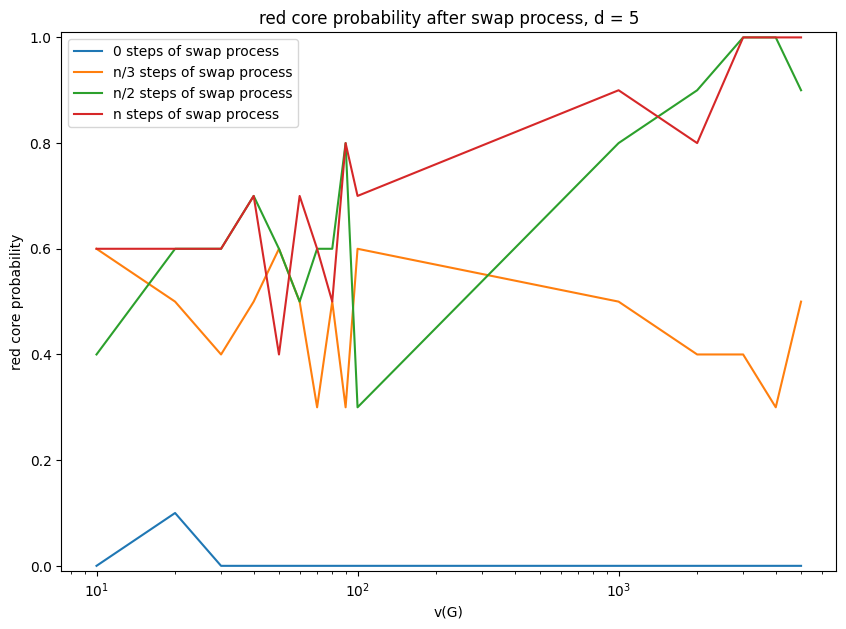

In [2]:
%%time

d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas_0 = []
probas_1 = []
probas_3 = []
probas_2 = []
num_tests = 10

for size in tqdm(sizes):
    probas_0.append(swap_core_probability(d, size, 0 * size, num_tests, silent=True))
    probas_1.append(swap_core_probability(d, size, 1 * size, num_tests, silent=True))
    probas_3.append(swap_core_probability(d, size, size // 3, num_tests, silent=True))
    probas_2.append(swap_core_probability(d, size, size // 2, num_tests, silent=True))

print(sizes)
print(probas_0)
print(probas_1)
print(probas_2)
print(probas_3)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('red core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of swap process')
plt.plot(sizes, probas_3, label='n/3 steps of swap process')
plt.plot(sizes, probas_2, label='n/2 steps of swap process')
plt.plot(sizes, probas_1, label='n steps of swap process')
plt.title(f'red core probability after swap process, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_swap{d}.png')

In [65]:
np.sort(np.hstack((np.arange(0, 1, 0.2), np.arange(0.25, 0.39, 0.05), np.arange(0.31, 0.35, 0.01))))

array([0.  , 0.2 , 0.25, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.4 , 0.6 ,
       0.8 ])

In [63]:
np.arange(0.25, 0.39, 0.05)

array([0.25, 0.3 , 0.35])

100%|███████████████████████████████████████████████████████████████| 15/15 [33:04<00:00, 132.29s/it]


[0.   0.2  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.4  0.6
 0.8 ]
[0.0, 0.0, 0.07, 0.14, 0.33, 0.4, 0.65, 0.75, 0.92, 0.95, 0.96, 0.98, 0.98, 0.99, 1.0]


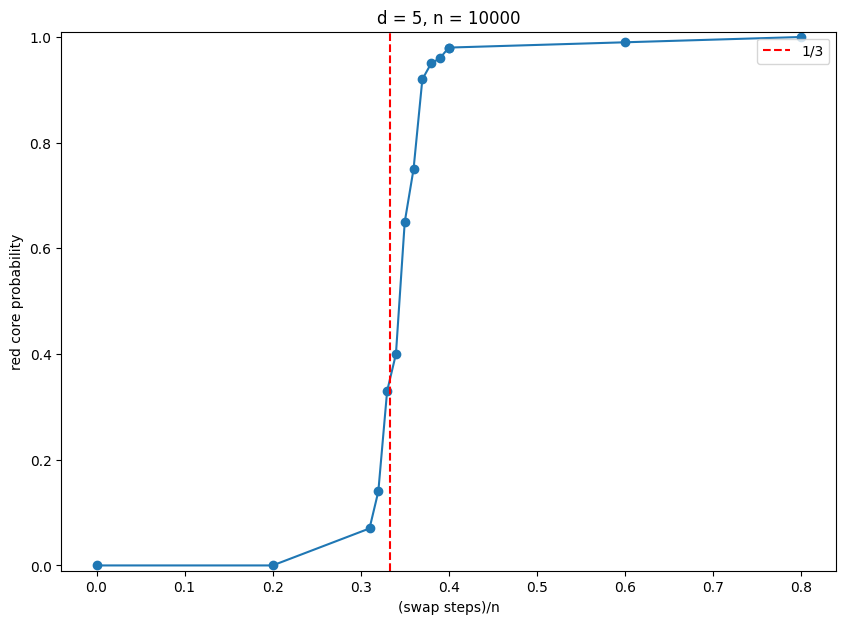

In [6]:
d = 5
num_vxs = 10000
nums_steps = np.sort(np.hstack((np.arange(0, 1, 0.2), np.arange(0.31, 0.4, 0.01))))

probas = []
num_tests = 100

for num_steps in tqdm(nums_steps):
    probas.append(swap_core_probability(d, num_vxs, int(num_steps * num_vxs), num_tests, silent=True))

print(nums_steps)
print(probas)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('(swap steps)/n')
plt.ylabel('red core probability')
plt.plot(nums_steps, probas)
plt.scatter(nums_steps, probas)
plt.title(f'd = {d}, n = {num_vxs}')
plt.axvline(x=1./3, linestyle='dashed', color='r', label='1/3')
# plt.axvline(x=1./np.pi, linestyle='dashed', color='b', label='1/pi')
plt.legend();
plt.savefig(f'proba_red_core_swap_{d}_{num_vxs}.png')

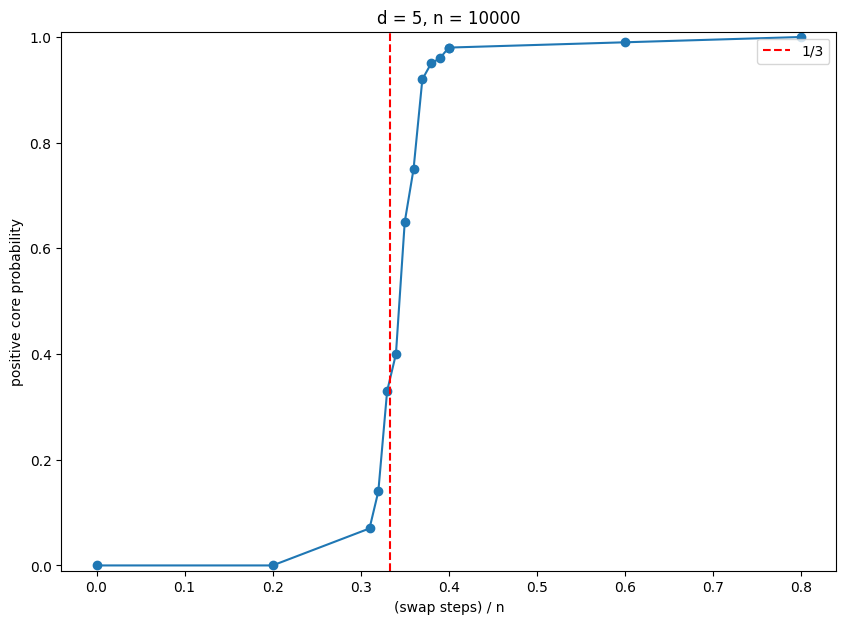

In [21]:
nums_steps = [0,   0.2,  0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.4,  0.6, 0.8]
probas = [0.0, 0.0, 0.07, 0.14, 0.33, 0.4, 0.65, 0.75, 0.92, 0.95, 0.96, 0.98, 0.98, 0.99, 1.0]
d = 5
num_vxs = 10000

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('(swap steps) / n')
plt.ylabel('positive core probability')
plt.plot(nums_steps, probas)
plt.scatter(nums_steps, probas)
plt.title(f'd = {d}, n = {num_vxs}')
plt.axvline(x=1./3, linestyle='dashed', color='r', label='1/3')
plt.legend();
plt.savefig(f'proba_red_core_swap_{d}_{num_vxs}.png')

100%|███████████████████████████████████████████████████████████████| 20/20 [43:48<00:00, 131.45s/it]


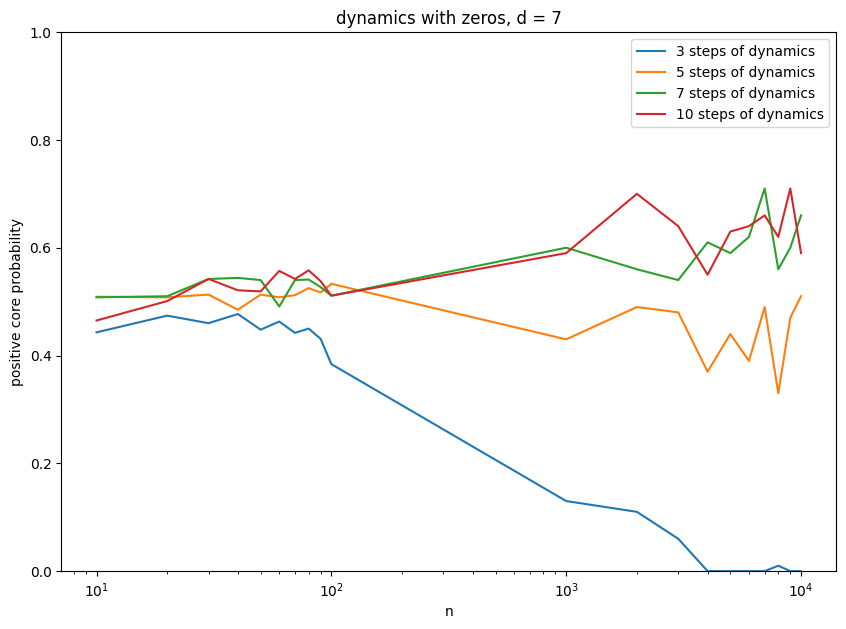

In [22]:
d = 7
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))

probas_3 = []
probas_5 = []
probas_7 = []
probas_10 = []
num_tests_small = 100
num_tests_big = 1000

for size in tqdm(sizes):
    probas_3.append(core_probability_with_zeros(d, size, 3, num_tests_big if size < 1000 else num_tests_small))
    probas_5.append(core_probability_with_zeros(d, size, 5, num_tests_big if size < 1000 else num_tests_small))
    probas_7.append(core_probability_with_zeros(d, size, 7, num_tests_big if size < 1000 else num_tests_small))
    probas_10.append(core_probability_with_zeros(d, size, 10, num_tests_big if size < 1000 else num_tests_small))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('n')
plt.ylabel('positive core probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='3 steps of dynamics')
plt.plot(sizes, probas_5, label='5 steps of dynamics')
plt.plot(sizes, probas_7, label='7 steps of dynamics')
plt.plot(sizes, probas_10, label='10 steps of dynamics')
plt.title(f'dynamics with zeros, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_with_zeros_{d}.png')

100%|████████████████████████████████████████████████████████████████| 20/20 [21:48<00:00, 65.42s/it]


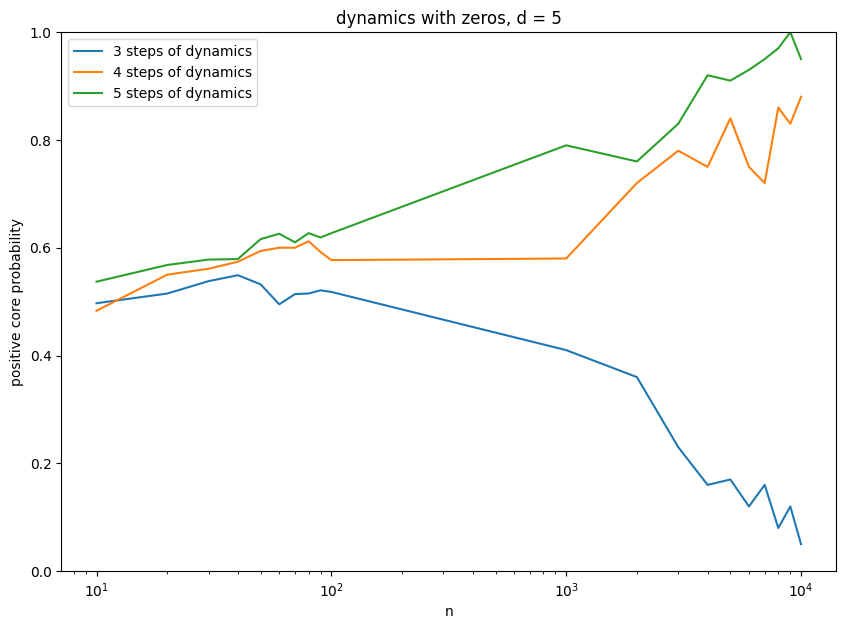

In [23]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))

probas_3 = []
probas_4 = []
probas_5 = []
num_tests_small = 100
num_tests_big = 1000

for size in tqdm(sizes):
    probas_3.append(core_probability_with_zeros(d, size, 3, num_tests_big if size < 1000 else num_tests_small))
    probas_4.append(core_probability_with_zeros(d, size, 4, num_tests_big if size < 1000 else num_tests_small))
    probas_5.append(core_probability_with_zeros(d, size, 5, num_tests_big if size < 1000 else num_tests_small))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('n')
plt.ylabel('positive core probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='3 steps of dynamics')
plt.plot(sizes, probas_4, label='4 steps of dynamics')
plt.plot(sizes, probas_5, label='5 steps of dynamics')
plt.title(f'dynamics with zeros, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_with_zeros_{d}.png')

100%|████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.57s/it]


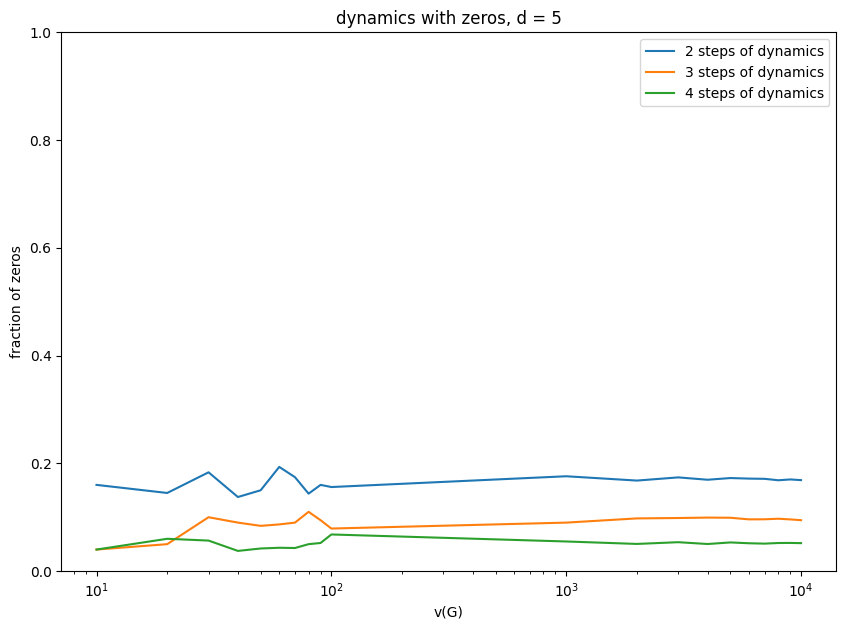

In [2]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))

probas_2 = []
probas_3 = []
probas_4 = []
num_tests = 10

for size in tqdm(sizes):
    probas_2.append(zeros_fraction_with_zeros(d, size, 2, num_tests, silent=True))
    probas_3.append(zeros_fraction_with_zeros(d, size, 3, num_tests, silent=True))
    probas_4.append(zeros_fraction_with_zeros(d, size, 4, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('fraction of zeros')
plt.xscale('log')
plt.plot(sizes, probas_2, label='2 steps of dynamics')
plt.plot(sizes, probas_3, label='3 steps of dynamics')
plt.plot(sizes, probas_4, label='4 steps of dynamics')
plt.title(f'dynamics with zeros, d = {d}')
plt.legend();
plt.savefig(f'zero_fraction_with_zeros_{d}.png')

100%|████████████████████████████████████████████████████████████████| 15/15 [06:17<00:00, 25.16s/it]


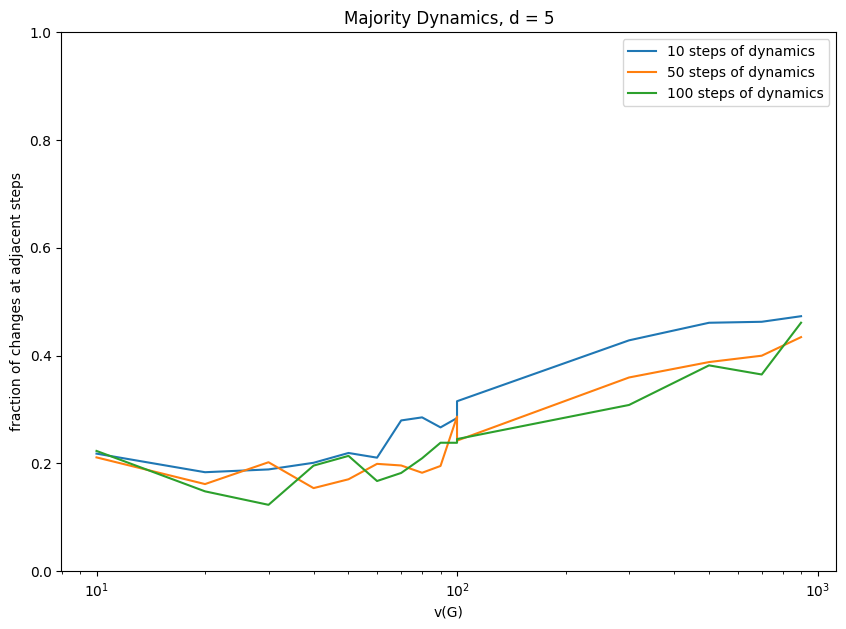

In [3]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 200)))

probas_10 = []
probas_50 = []
probas_100 = []
num_tests = 100

for size in tqdm(sizes):
    probas_10.append(changing_fraction_md(d, size, 10, num_tests, silent=True))
    probas_50.append(changing_fraction_md(d, size, 50, num_tests, silent=True))
    probas_100.append(changing_fraction_md(d, size, 100, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('fraction of changes at adjacent steps')
plt.xscale('log')
plt.plot(sizes, probas_10, label='10 steps of dynamics')
plt.plot(sizes, probas_50, label='50 steps of dynamics')
plt.plot(sizes, probas_100, label='100 steps of dynamics')
plt.title(f'Majority Dynamics, d = {d}')
plt.legend();
plt.savefig(f'changing_fraction_md_{d}.png')

100%|████████████████████████████████████████████████████████████████| 20/20 [01:20<00:00,  4.02s/it]


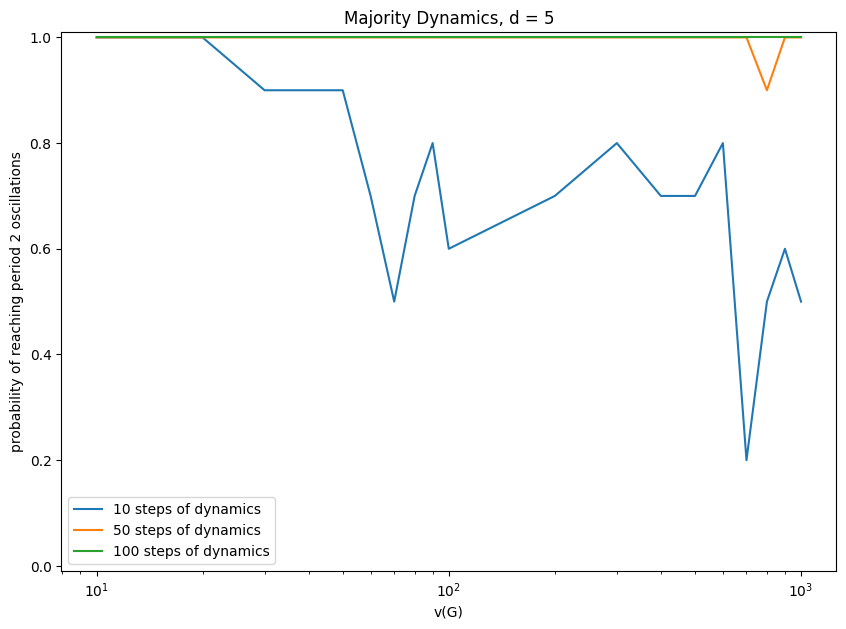

In [6]:
d = 5

# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 100)))

probas_10 = []
probas_50 = []
probas_100 = []
num_tests = 10

for size in tqdm(sizes):
    probas_10.append(proba_oscillations_md(d, size, 10, num_tests, silent=True))
    probas_50.append(proba_oscillations_md(d, size, 50, num_tests, silent=True))
    probas_100.append(proba_oscillations_md(d, size, 100, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('probability of reaching period 2 oscillations')
plt.xscale('log')
plt.plot(sizes, probas_10, label='10 steps of dynamics')
plt.plot(sizes, probas_50, label='50 steps of dynamics')
plt.plot(sizes, probas_100, label='100 steps of dynamics')
plt.title(f'Majority Dynamics, d = {d}')
plt.legend();
plt.savefig(f'oscillation_proba_md_{d}.png')

100%|████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.46it/s]


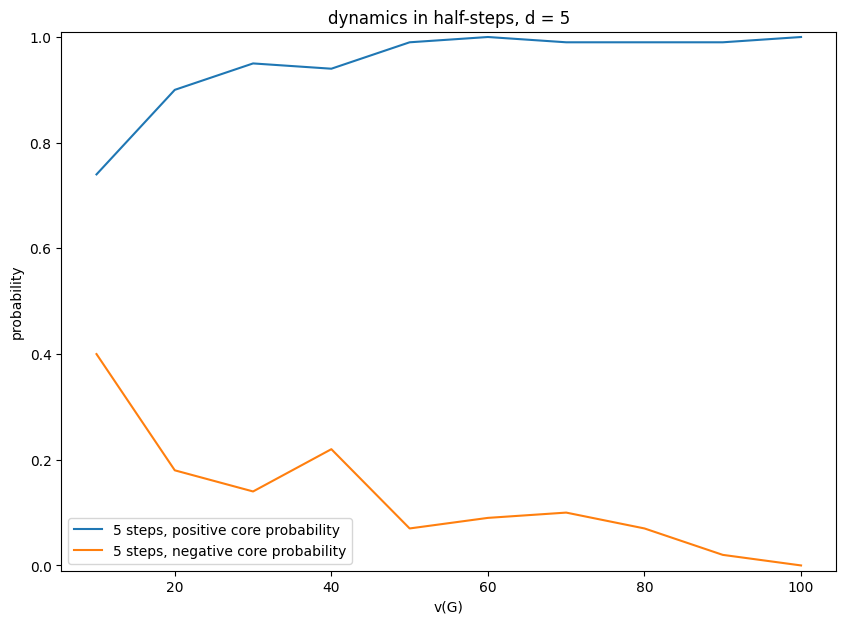

In [6]:
d = 5
sizes = np.arange(10, 101, 10).astype(int)
# sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas_1_pos = []
probas_1_neg = []
num_tests = 100

for size in tqdm(sizes):
    p_1_pos, p_1_neg = core_probability_in_halves(d, size, 5, num_tests, silent=True)
    probas_1_pos.append(p_1_pos)
    probas_1_neg.append(p_1_neg)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('probability')
# plt.xscale('log')
plt.plot(sizes, probas_1_pos, label='5 steps, positive core probability')
plt.plot(sizes, probas_1_neg, label='5 steps, negative core probability')
plt.title(f'dynamics in half-steps, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_in_halves_{d}.png')

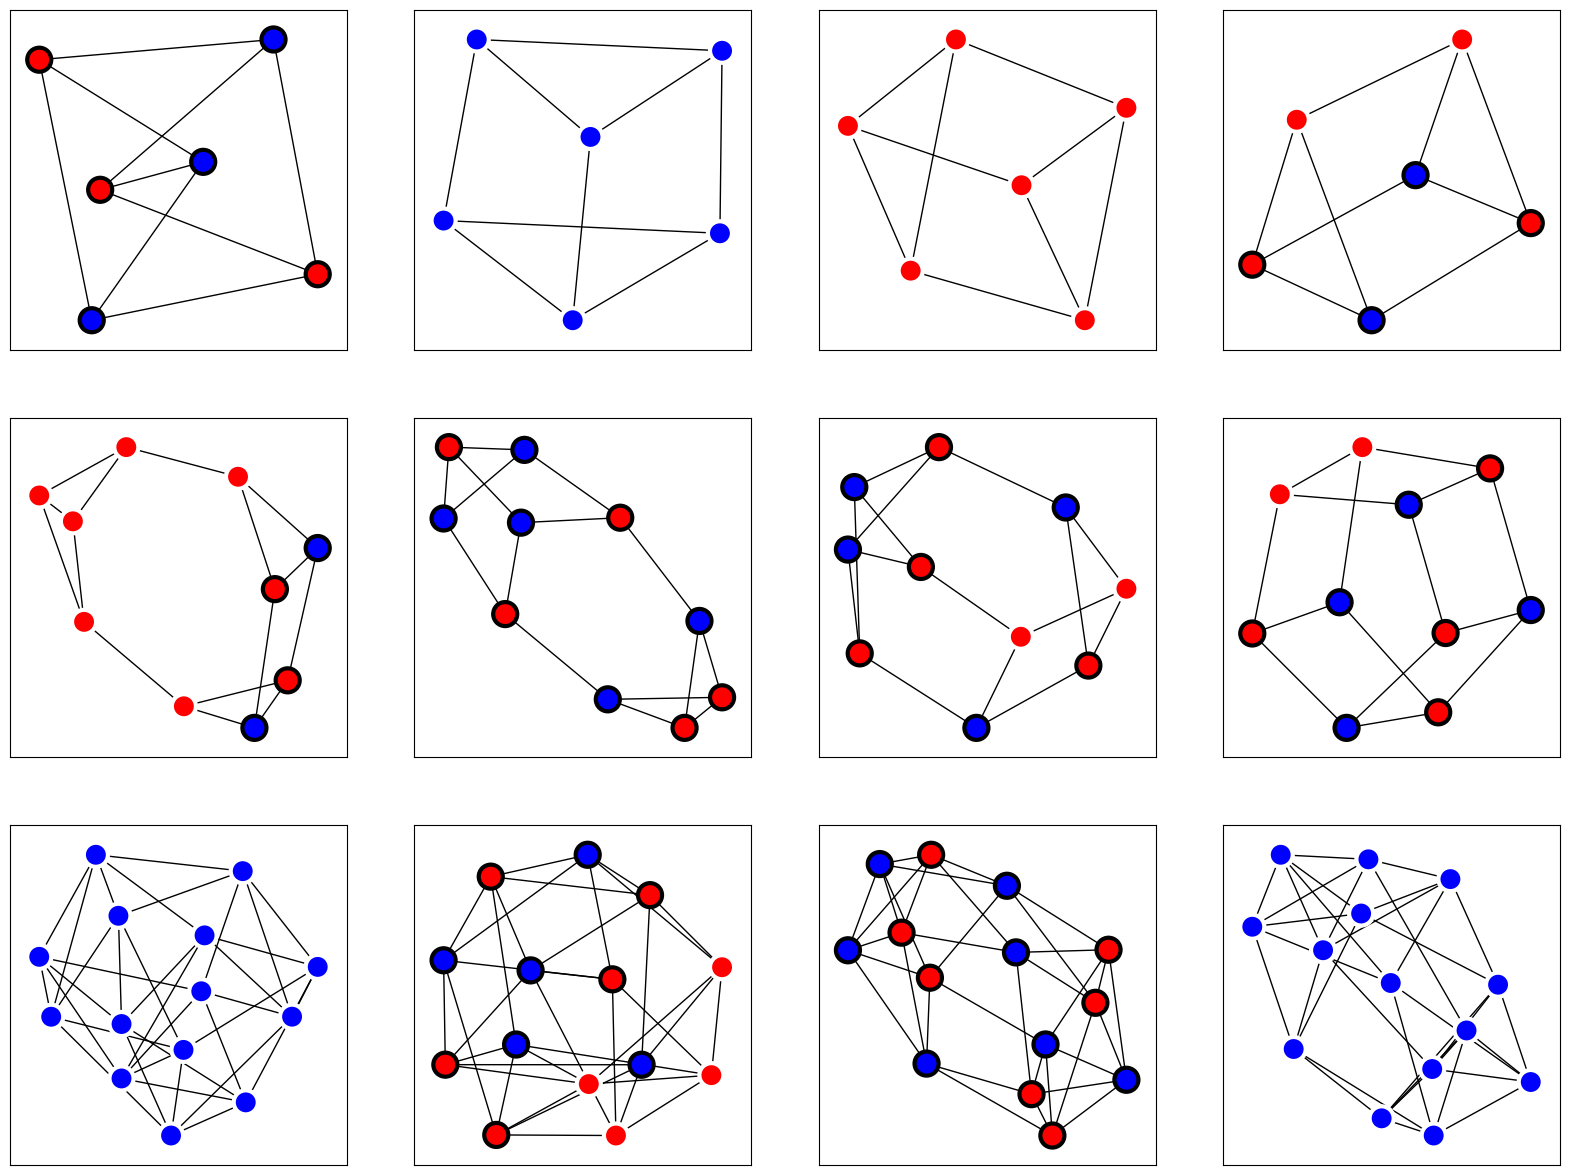

In [39]:
fig, ax = plt.subplots(3, 4, figsize=(20, 15))

for i in range(3):
    for j in range(4):
        graph = nx.random_regular_graph(5 if i == 2 else 3, 6 + 4 * i)
        result = generate_result(graph)

        plt.subplot(3, 4, i * 4 + j + 1)
        colors = ['red' if x == 1 else 'blue' for x in result[0]]
        edgecolors = ['black' if x != y else 'white' for x, y in zip(result[0], result[1])]
        nx.draw_networkx(graph, 
                         node_color=colors, 
                         with_labels=False, 
                         pos=nx.spring_layout(graph), 
                         edgecolors=edgecolors, 
                         linewidths=3, 
                         nodelist=range(graph.number_of_nodes()))

plt.savefig(f'gallery.png')

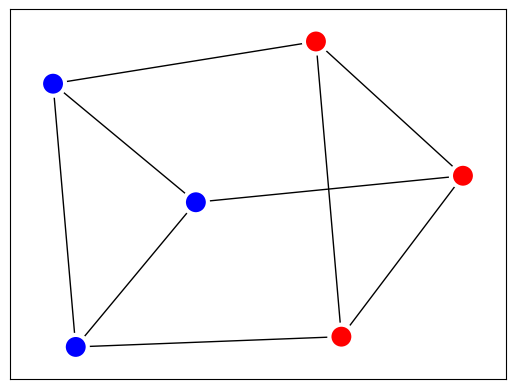

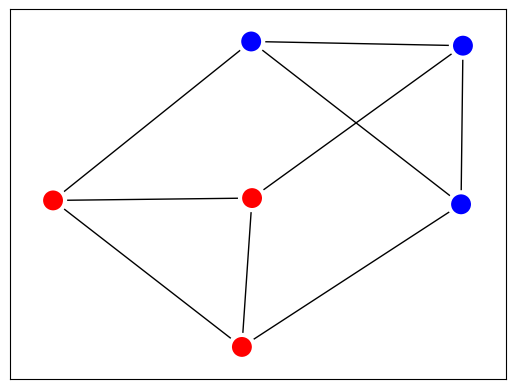

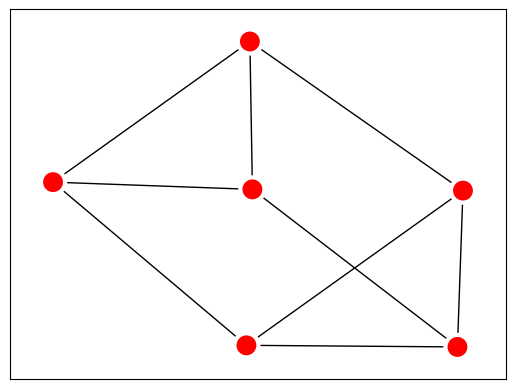

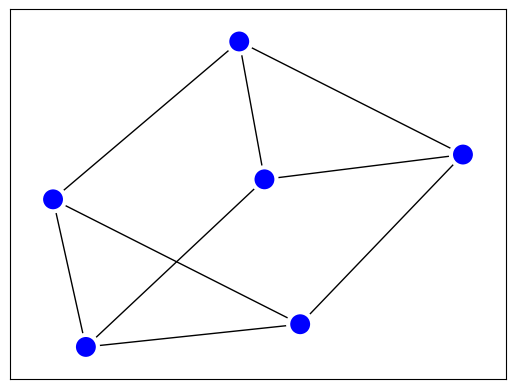

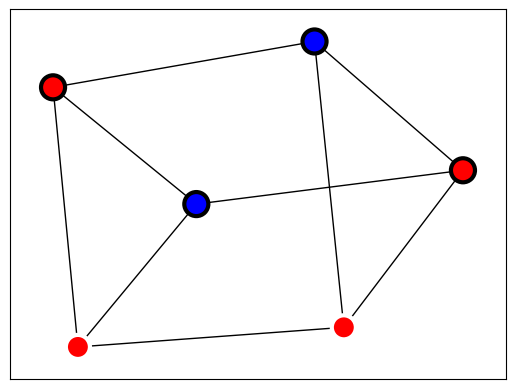

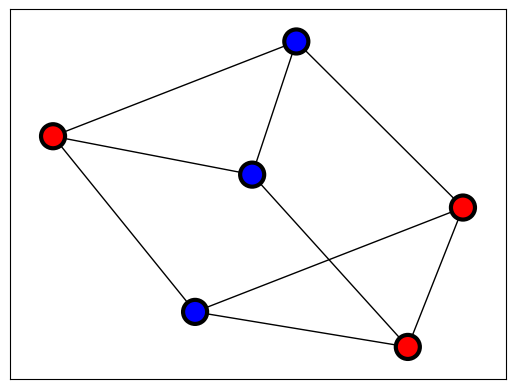

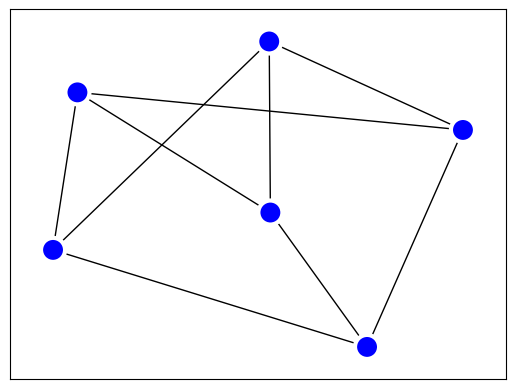

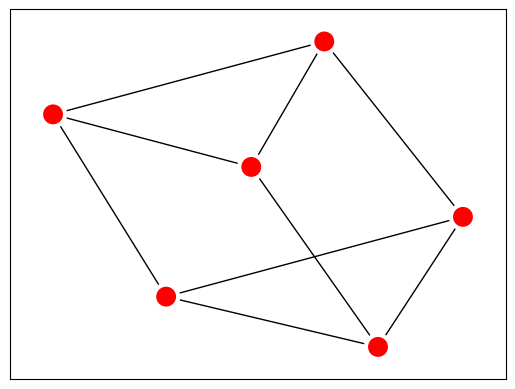

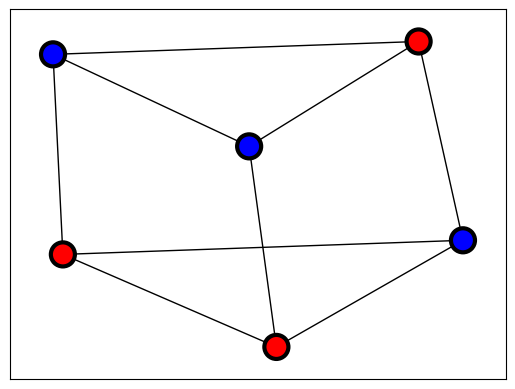

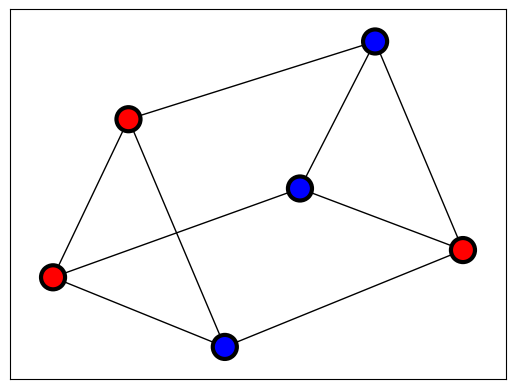

In [34]:
d = 3
num_vxs = 6

for i in range(10):
    graph = nx.random_regular_graph(d, num_vxs)
    result = generate_result(graph)
    draw_result(graph, result)

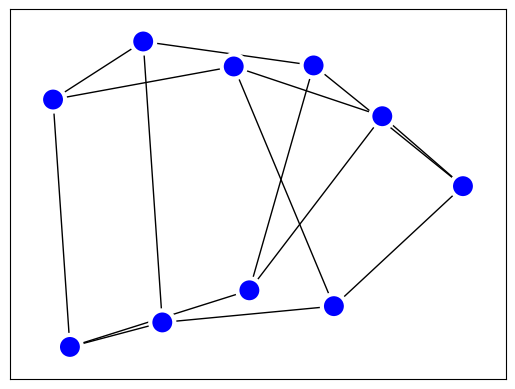

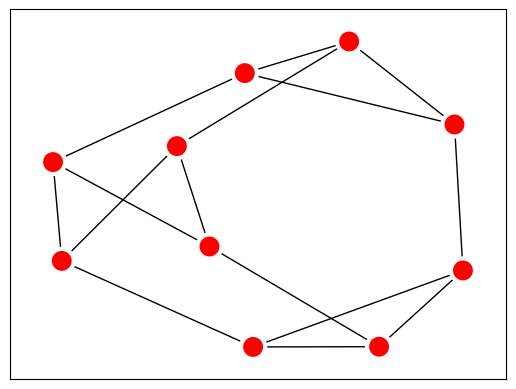

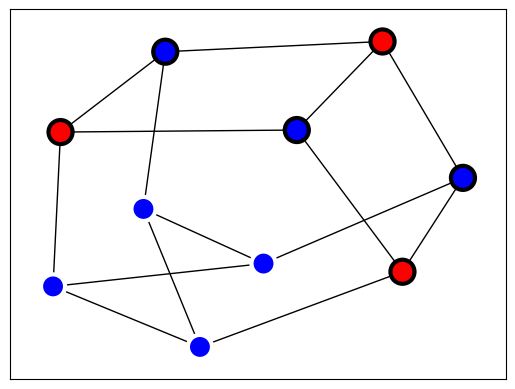

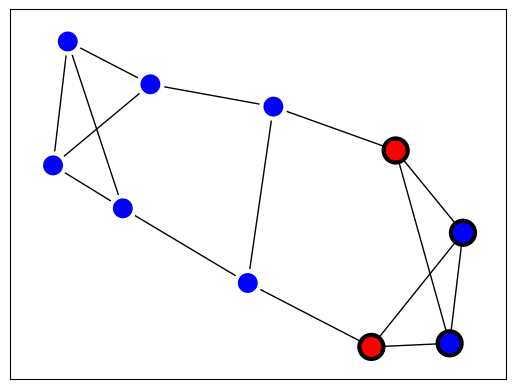

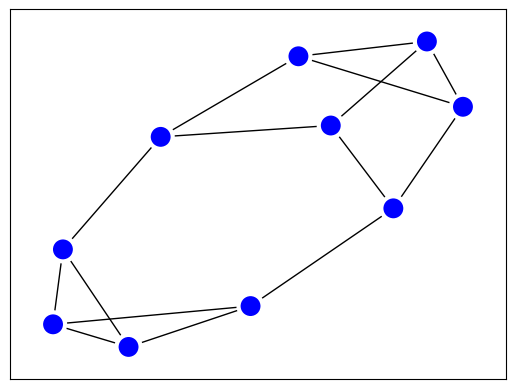

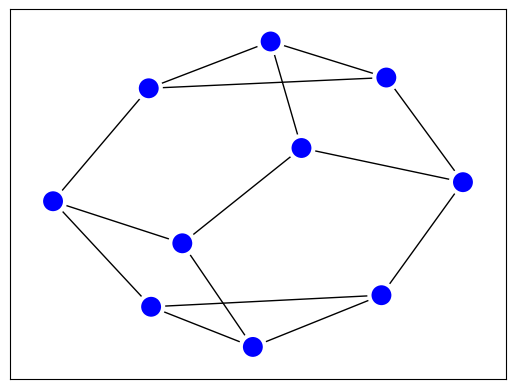

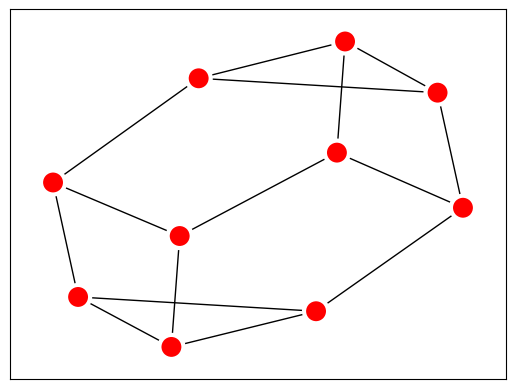

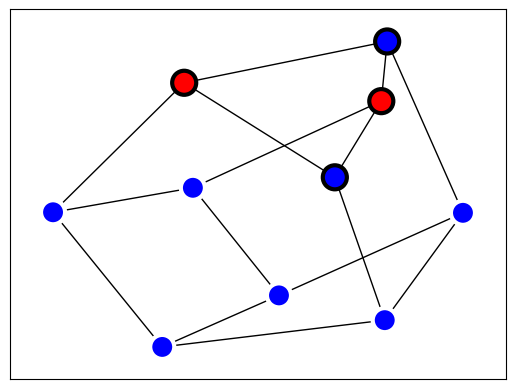

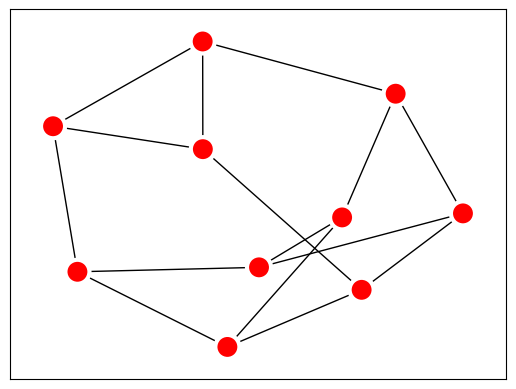

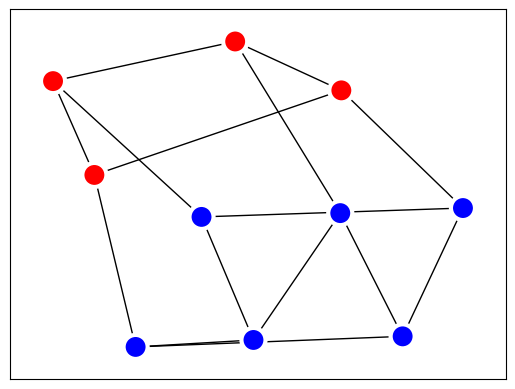

In [3]:
d = 3
num_vxs = 10

for i in range(10):
    graph = nx.random_regular_graph(d, num_vxs)
    result = generate_result(graph)
    draw_result(graph, result)

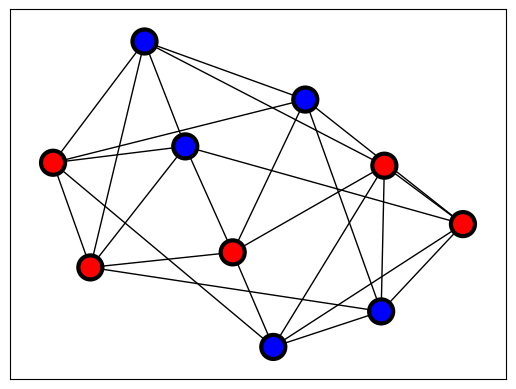

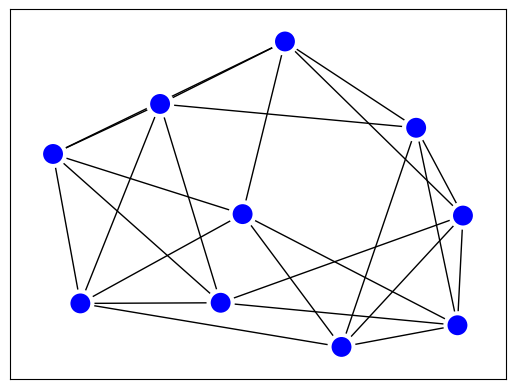

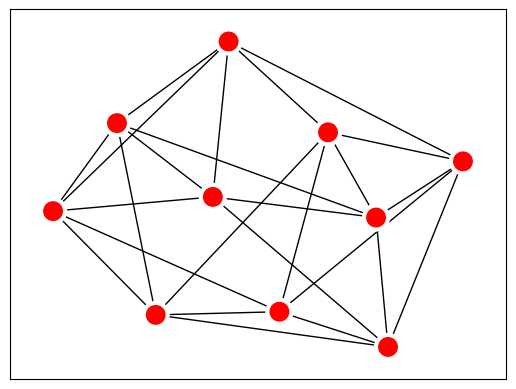

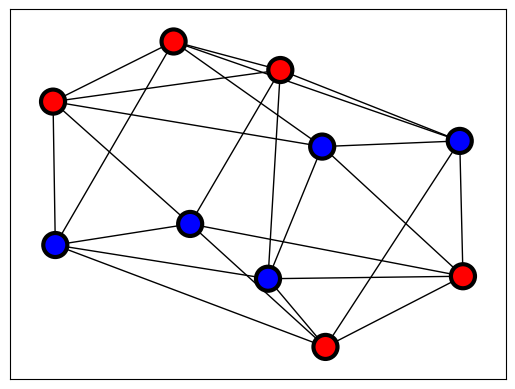

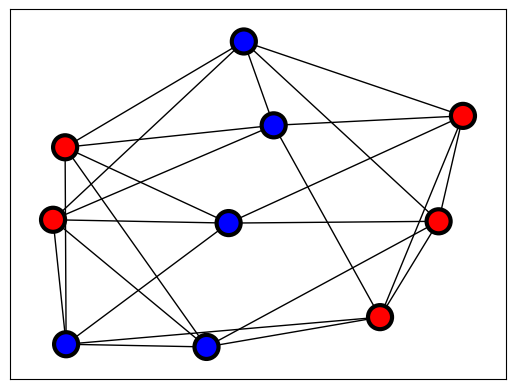

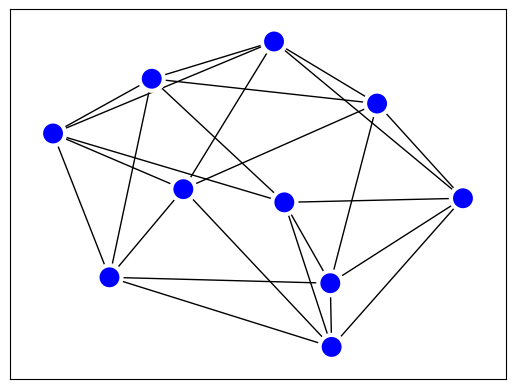

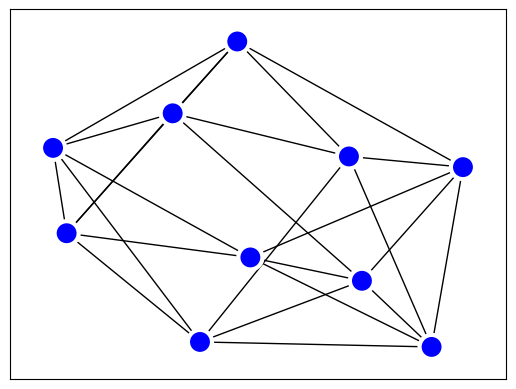

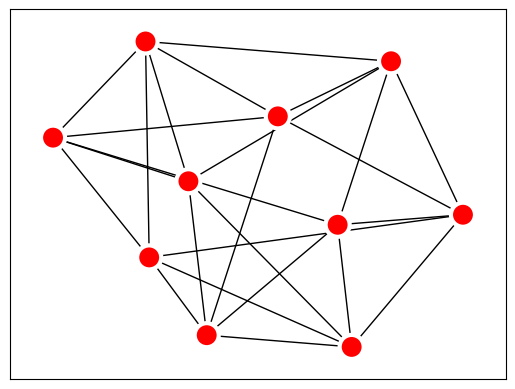

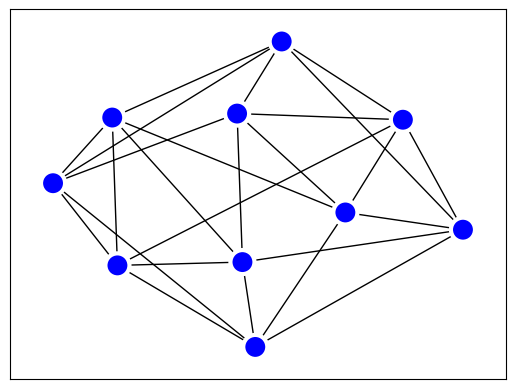

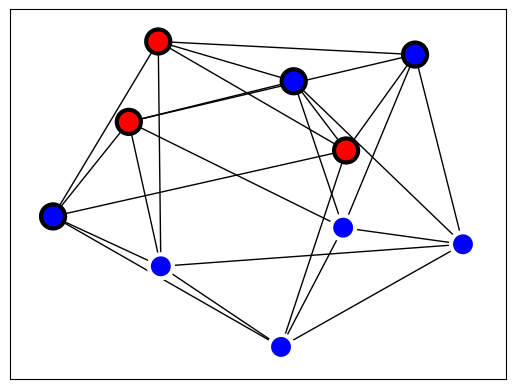

In [2]:
d = 5
num_vxs = 10

for i in range(10):
    graph = nx.random_regular_graph(d, num_vxs)
    result = generate_result(graph)
    draw_result(graph, result)

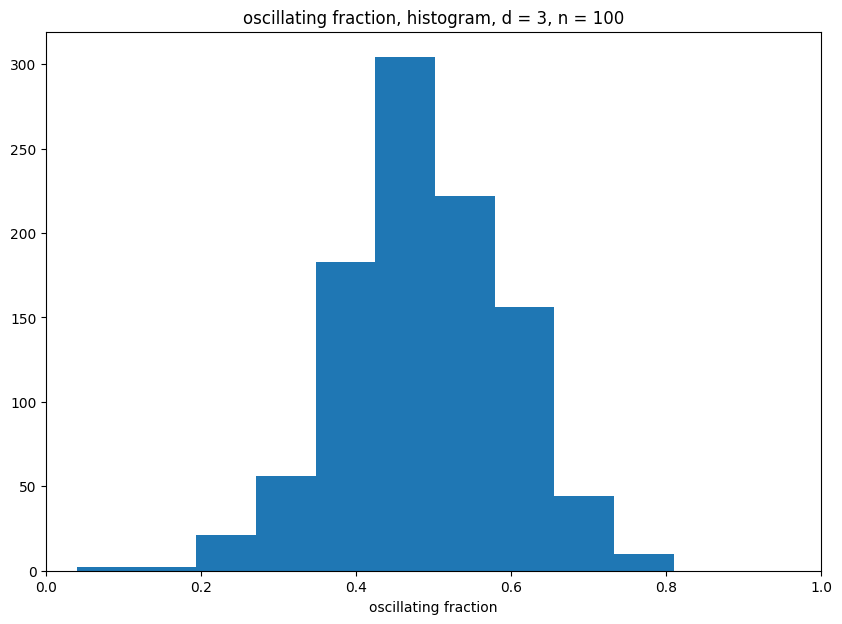

In [2]:
d = 3
num_vxs = 100

fractions = oscillating_fractions(num_vxs, d, 1000)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

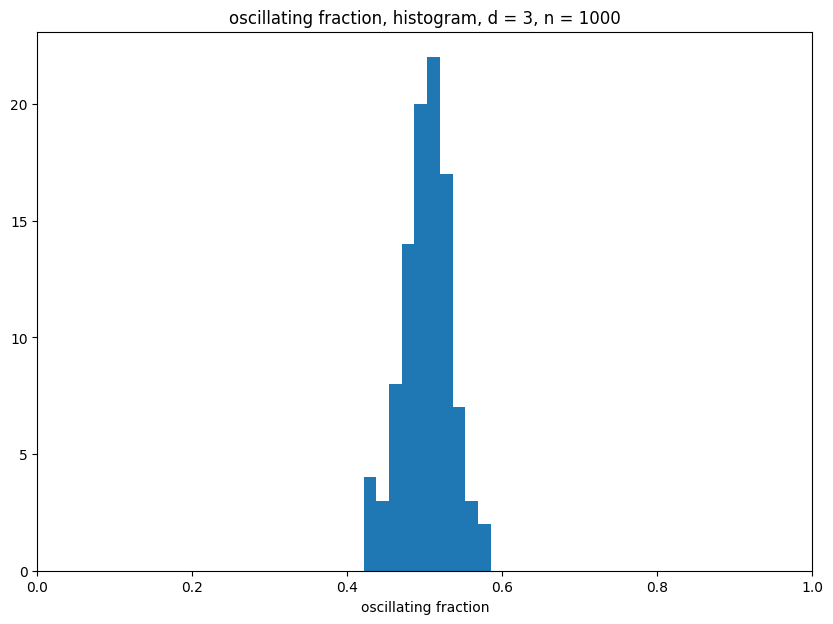

In [10]:
d = 3
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 100)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

[0.0, 0.0, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


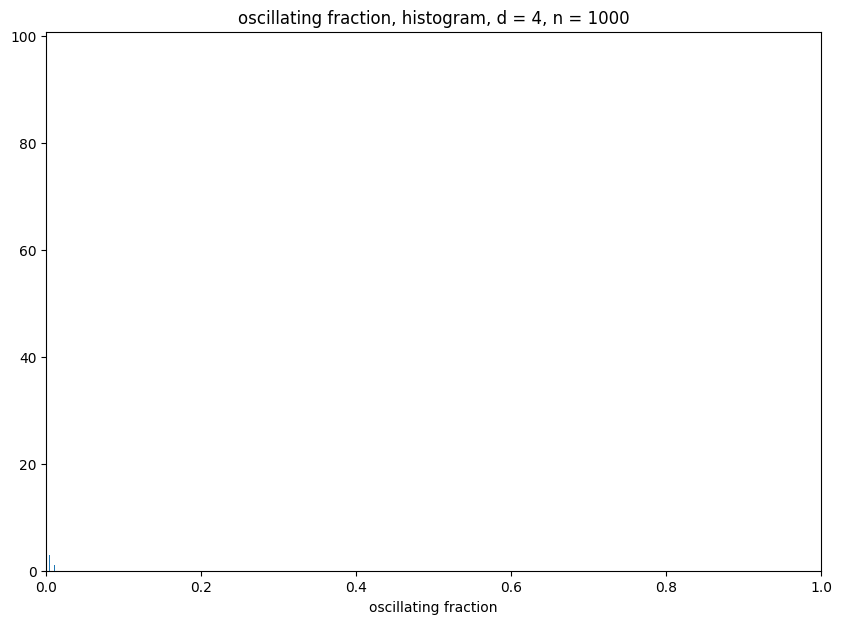

In [13]:
d = 4
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 100)
print(fractions)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

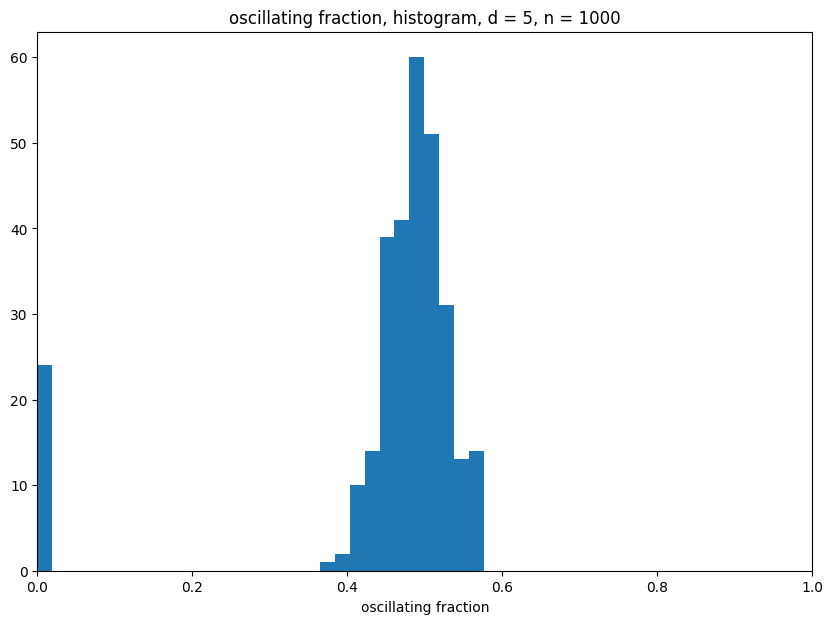

In [17]:
d = 5
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

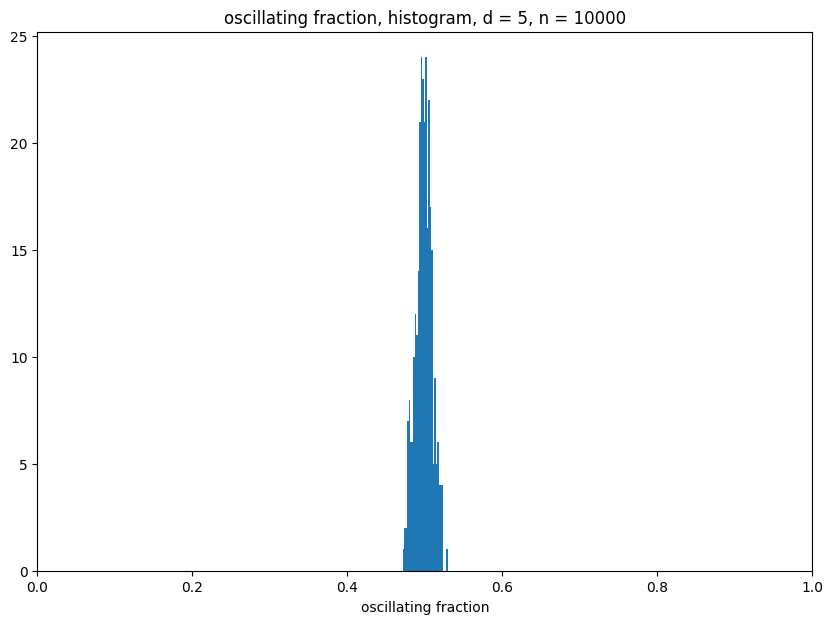

In [24]:
d = 5
num_vxs = 10000

fractions = oscillating_fractions(num_vxs, d, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


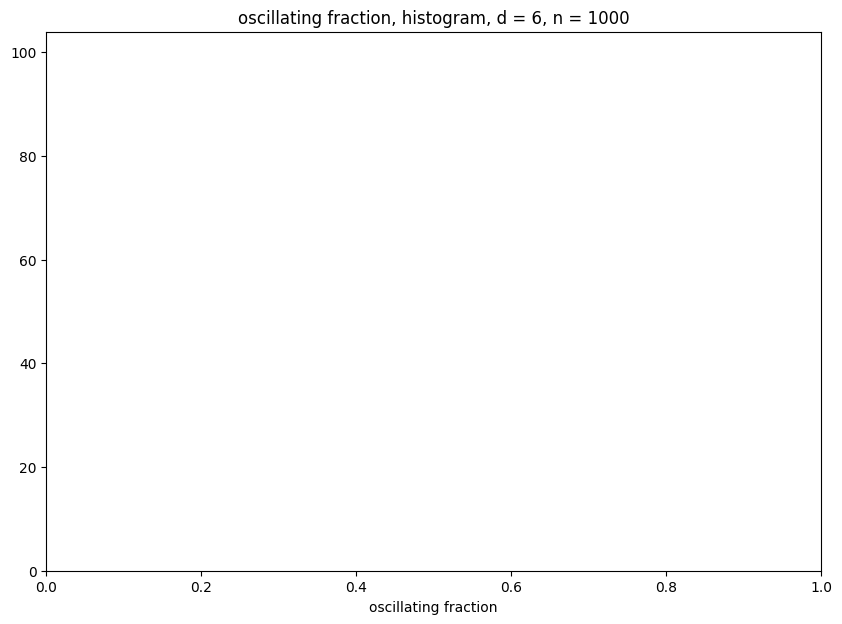

In [22]:
d = 6
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 100)
print(fractions)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

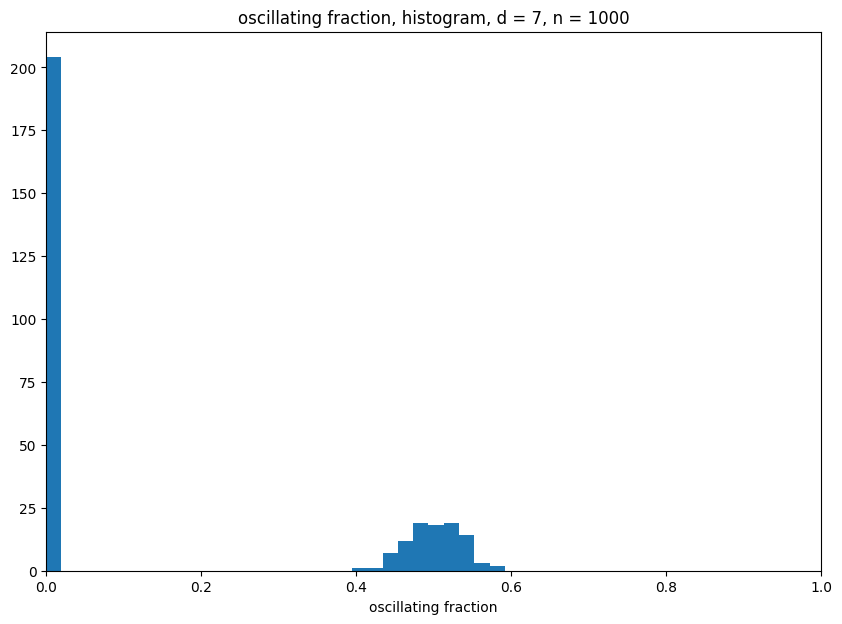

In [21]:
d = 7
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

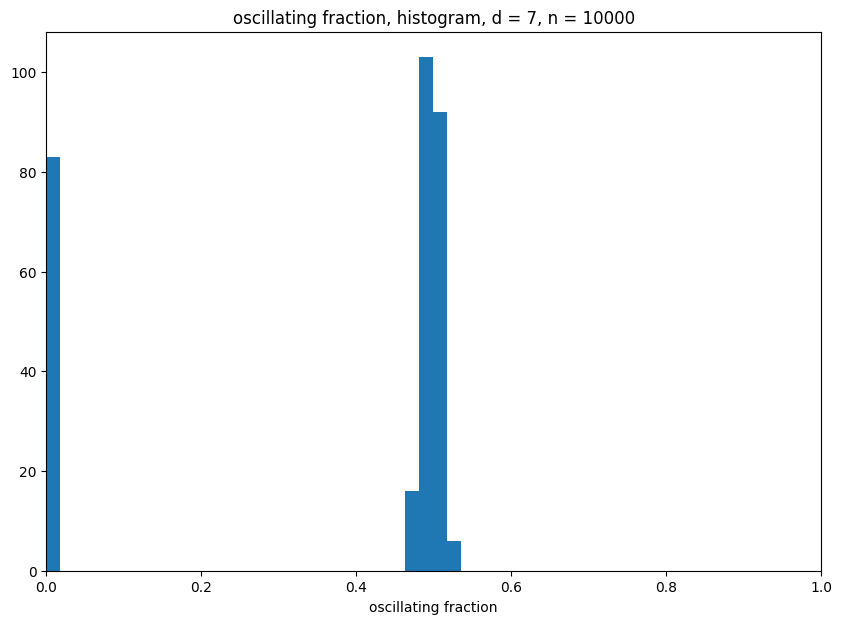

In [25]:
d = 7
num_vxs = 10000

fractions = oscillating_fractions(num_vxs, d, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

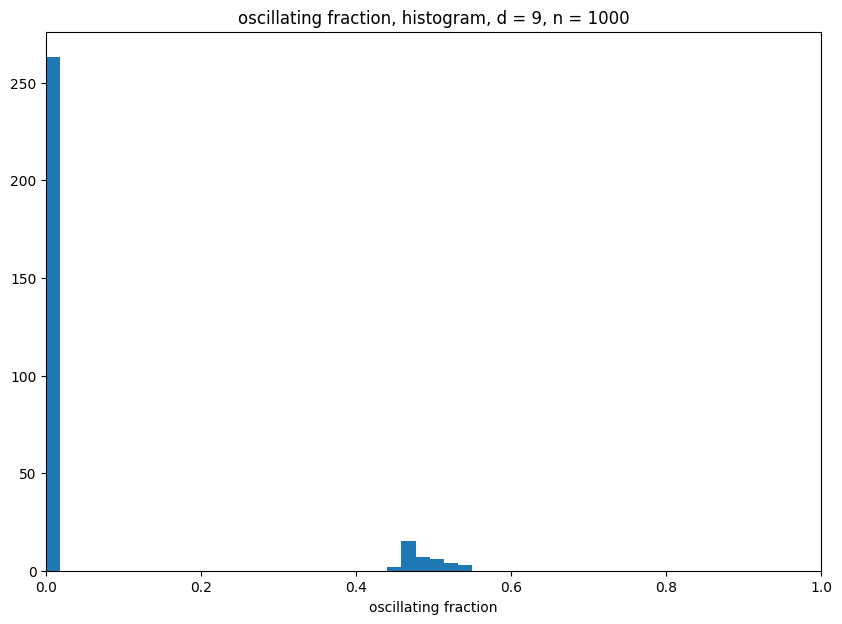

In [23]:
d = 9
num_vxs = 1000

fractions = oscillating_fractions(num_vxs, d, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, d = {d}, n = {num_vxs}')
plt.savefig(f'oscillating_hist_{d}_{num_vxs}.png')

In [20]:
%%time
fractions = []

for d in [3, 4, 5, 6, 7]:
    for n in [1000, 10000, 100000]:
        print(f'n = {n}, d = {d}:')
        fractions.append(oscillating_fractions(n, d, 100 if n == 100000 else 300))
        print(fractions[-1])

n = 1000, d = 3:
[0.499, 0.519, 0.52, 0.524, 0.554, 0.473, 0.53, 0.489, 0.525, 0.548, 0.51, 0.501, 0.49, 0.482, 0.487, 0.562, 0.498, 0.449, 0.571, 0.515, 0.556, 0.489, 0.528, 0.485, 0.506, 0.453, 0.498, 0.433, 0.458, 0.508, 0.481, 0.494, 0.481, 0.474, 0.525, 0.483, 0.522, 0.486, 0.468, 0.496, 0.476, 0.478, 0.497, 0.469, 0.467, 0.515, 0.482, 0.475, 0.455, 0.555, 0.502, 0.481, 0.544, 0.507, 0.531, 0.476, 0.55, 0.479, 0.471, 0.484, 0.546, 0.451, 0.443, 0.455, 0.509, 0.472, 0.433, 0.518, 0.489, 0.479, 0.458, 0.491, 0.519, 0.48, 0.496, 0.528, 0.487, 0.45, 0.546, 0.551, 0.438, 0.516, 0.504, 0.492, 0.478, 0.502, 0.477, 0.496, 0.458, 0.432, 0.451, 0.503, 0.461, 0.466, 0.464, 0.485, 0.487, 0.52, 0.463, 0.497, 0.476, 0.507, 0.5, 0.496, 0.513, 0.488, 0.449, 0.482, 0.485, 0.451, 0.555, 0.476, 0.515, 0.477, 0.448, 0.436, 0.481, 0.475, 0.507, 0.488, 0.544, 0.521, 0.506, 0.495, 0.489, 0.484, 0.54, 0.465, 0.523, 0.537, 0.499, 0.479, 0.525, 0.486, 0.473, 0.524, 0.538, 0.553, 0.515, 0.548, 0.516, 0.458,

In [21]:
out_file = open("fractions.json", "w") 
json.dump(fractions, out_file) 
out_file.close() 

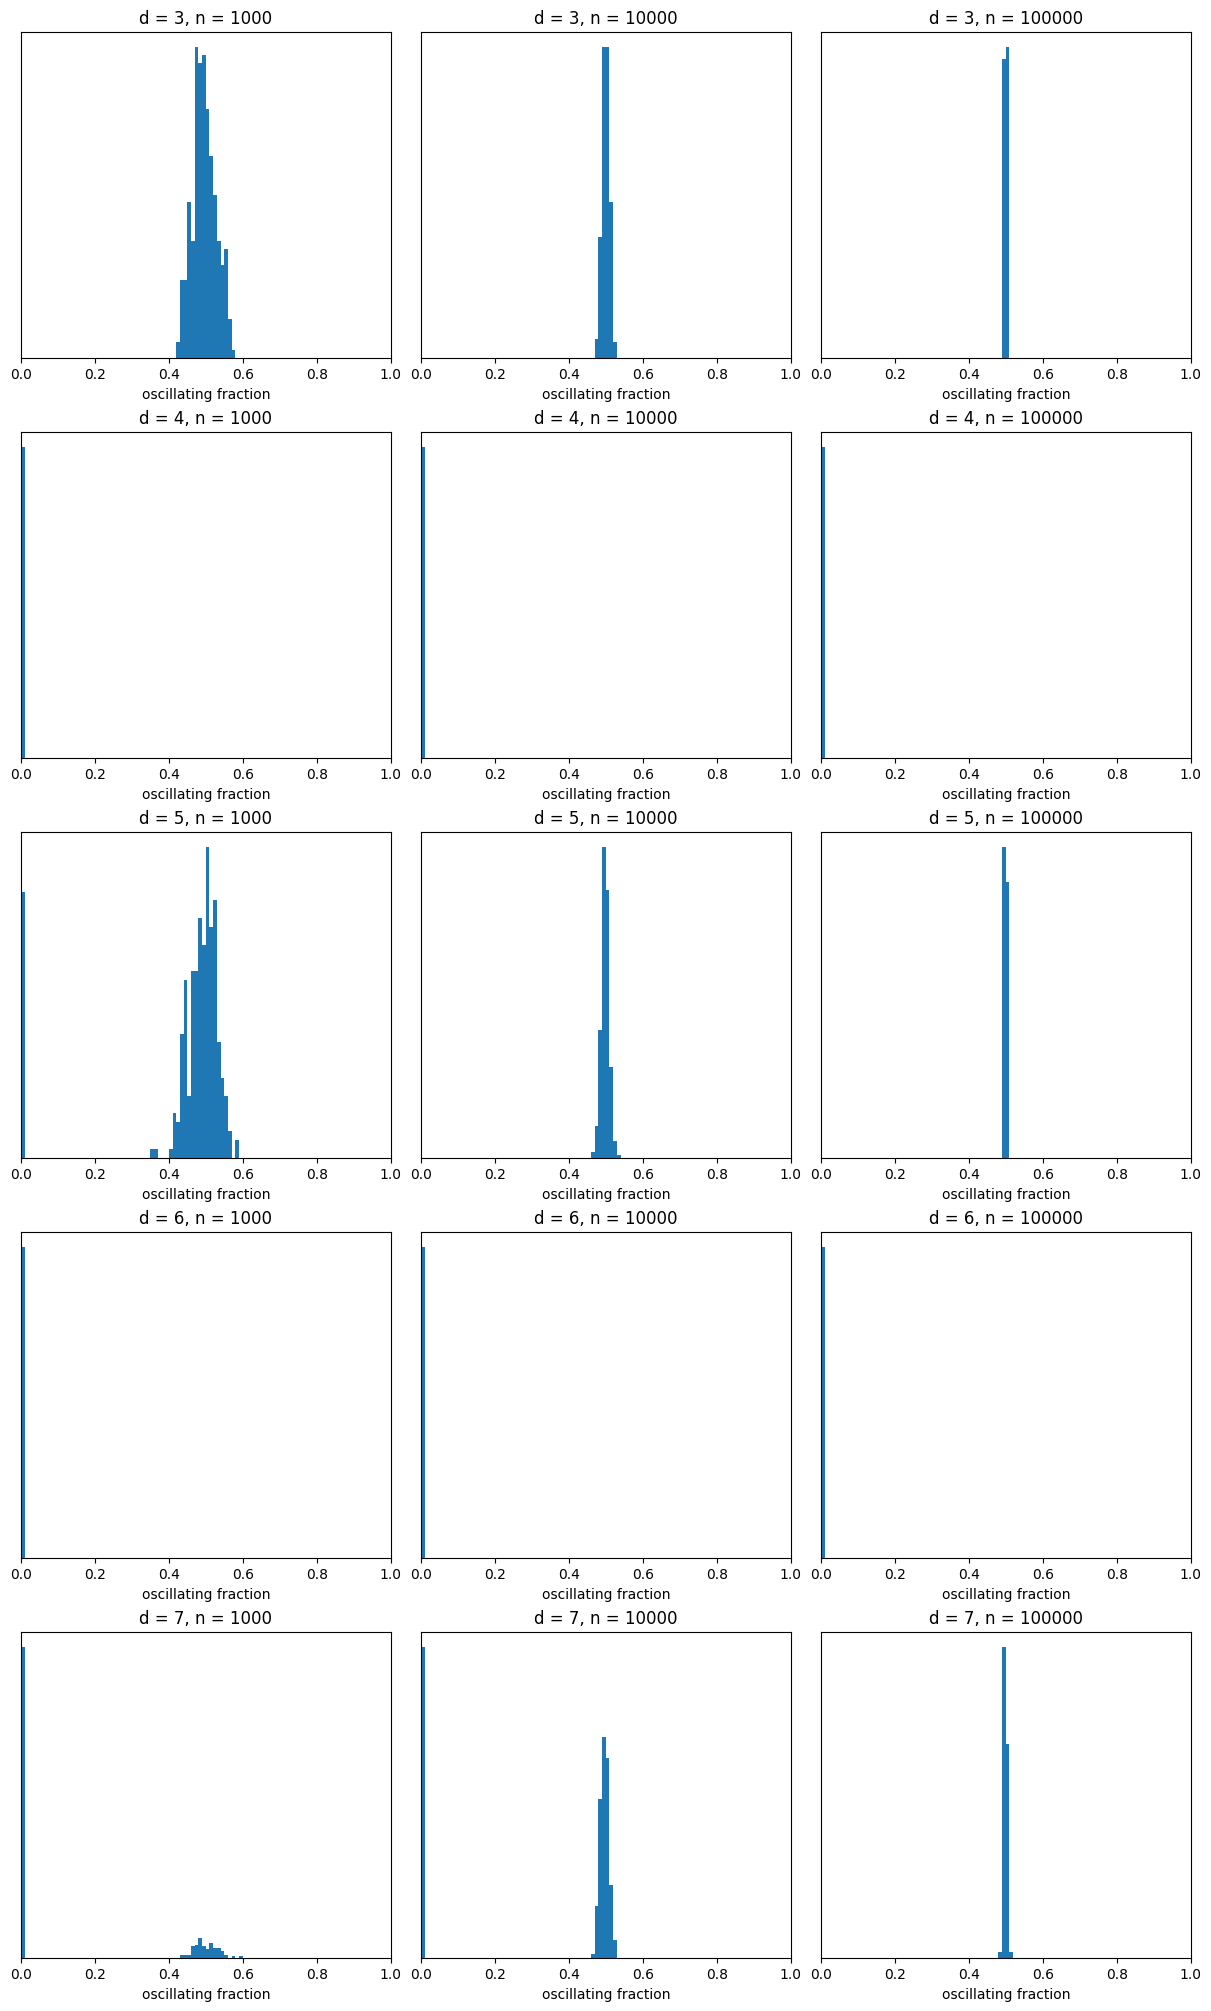

In [23]:
fig, ax = plt.subplots(5, 3, figsize=(12, 20), constrained_layout=True)

for i, d in enumerate([3, 4, 5, 6, 7]):
    for j, n in enumerate([1000, 10000, 100000]):
        plt.subplot(5, 3, i * 3 + j + 1)
        plt.xlim(0, 1)
        plt.xlabel('oscillating fraction')
        plt.yticks([])
        plt.hist(fractions[i * 3 + j], bins=100, range=(0, 1))
        plt.title(f'd = {d}, n = {n}')

plt.savefig(f'histograms.png')

In [40]:
d = 3
num_tests = 100

ns = (10 ** (1 + np.random.random(num_tests) * 3.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_converge(graph))

100%|██████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.18it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


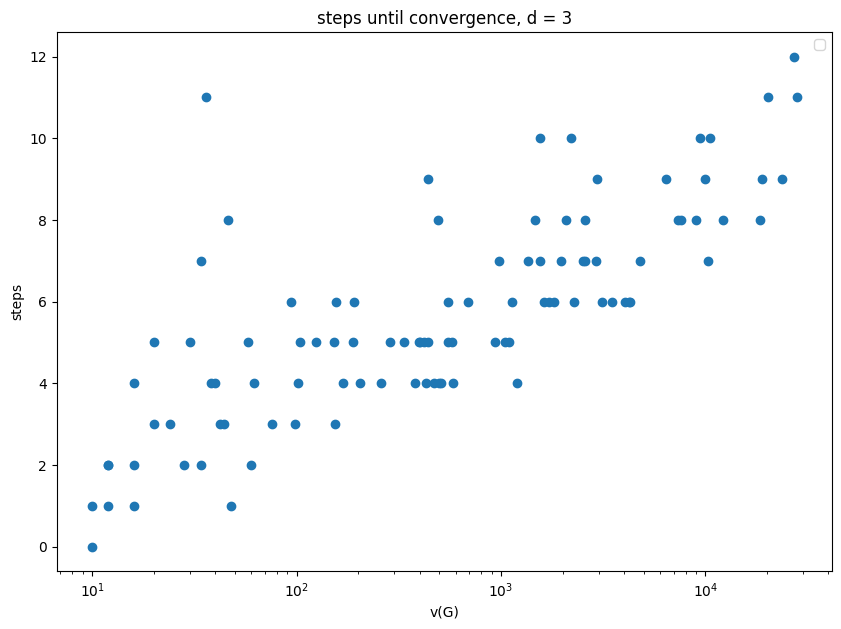

In [41]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title(f'steps until convergence, d = {d}')
plt.legend();
plt.savefig(f'steps_until_converge_{d}.png')

In [2]:
d = 4
num_tests = 100

ns = (10 ** (1 + np.random.random(num_tests) * 3.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_converge(graph))

100%|██████████████████████████████████████████████████████████████| 100/100 [02:38<00:00,  1.59s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


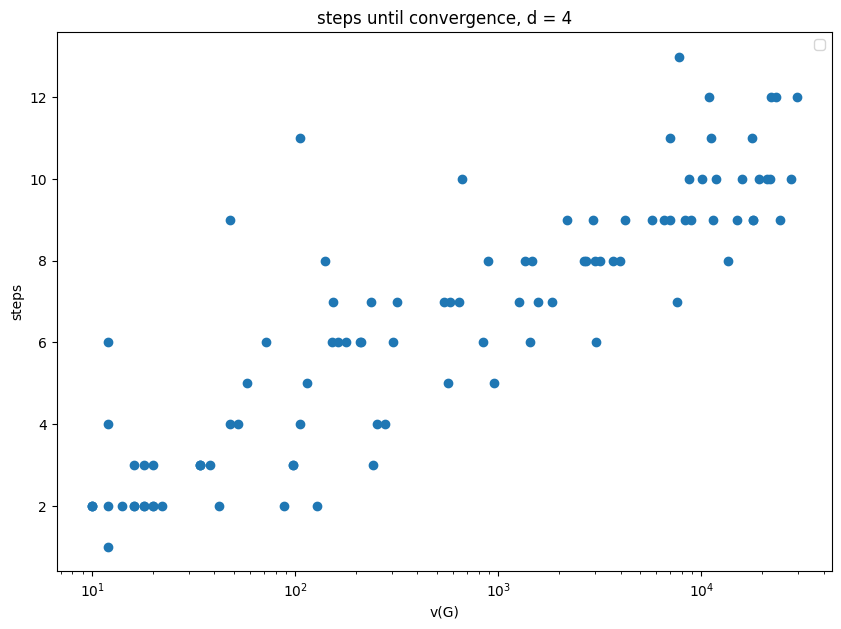

In [3]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title(f'steps until convergence, d = {d}')
plt.legend();
plt.savefig(f'steps_until_converge_{d}.png')

In [4]:
d = 5
num_tests = 100

ns = (10 ** (1 + np.random.random(num_tests) * 3.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_converge(graph))

100%|██████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


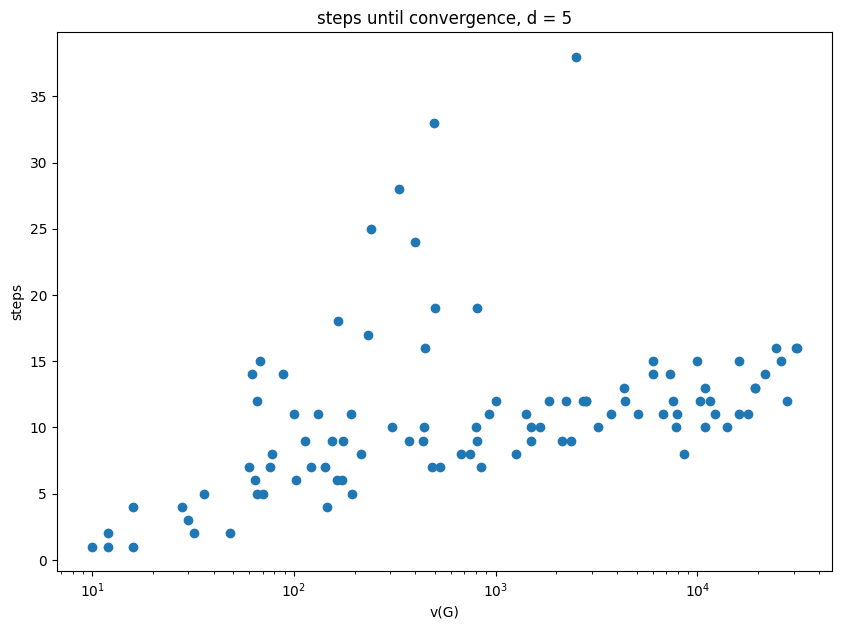

In [5]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title(f'steps until convergence, d = {d}')
plt.savefig(f'steps_until_converge_{d}.png')

In [6]:
d = 6
num_tests = 100

ns = (10 ** (1 + np.random.random(num_tests) * 3.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_converge(graph))

100%|██████████████████████████████████████████████████████████████| 100/100 [02:59<00:00,  1.79s/it]


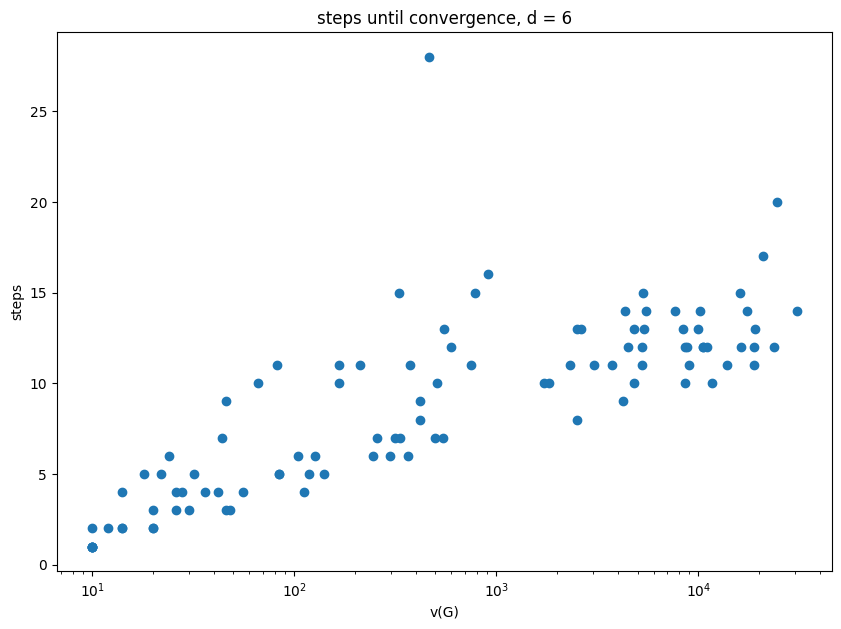

In [7]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title(f'steps until convergence, d = {d}')
plt.savefig(f'steps_until_converge_{d}.png')

In [8]:
d = 3
num_tests = 100

ns = (10 ** (2 + np.random.random(num_tests) * 2.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_approximately_converge(graph, 0.95))

100%|██████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.75it/s]


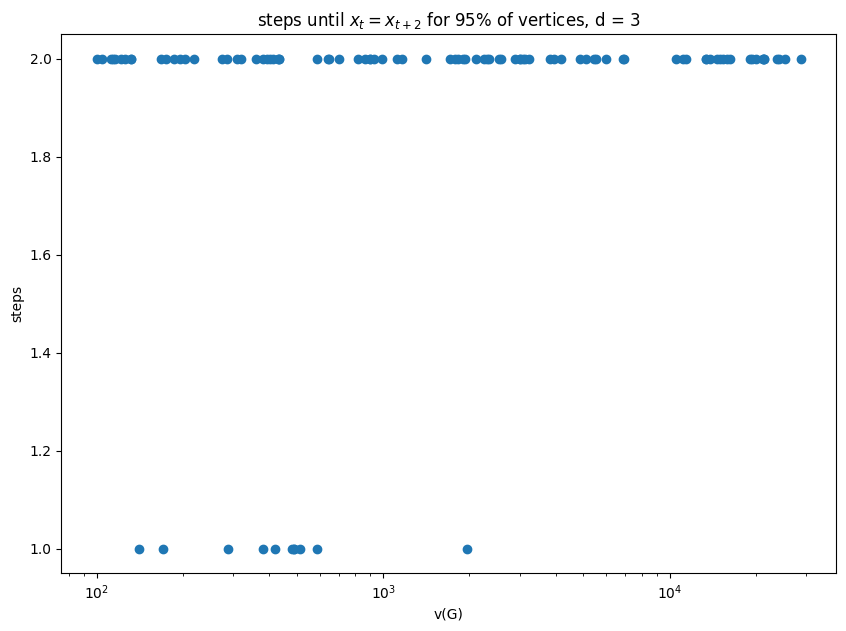

In [9]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title('steps until $x_t = x_{t+2}$ for 95% of vertices, d = ' + str(d))
plt.savefig(f'steps_until_approximately_converge_{d}.png')

In [6]:
d = 5
num_tests = 100

ns = (10 ** (2 + np.random.random(num_tests) * 2.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_approximately_converge(graph, 0.95))

100%|██████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.95it/s]


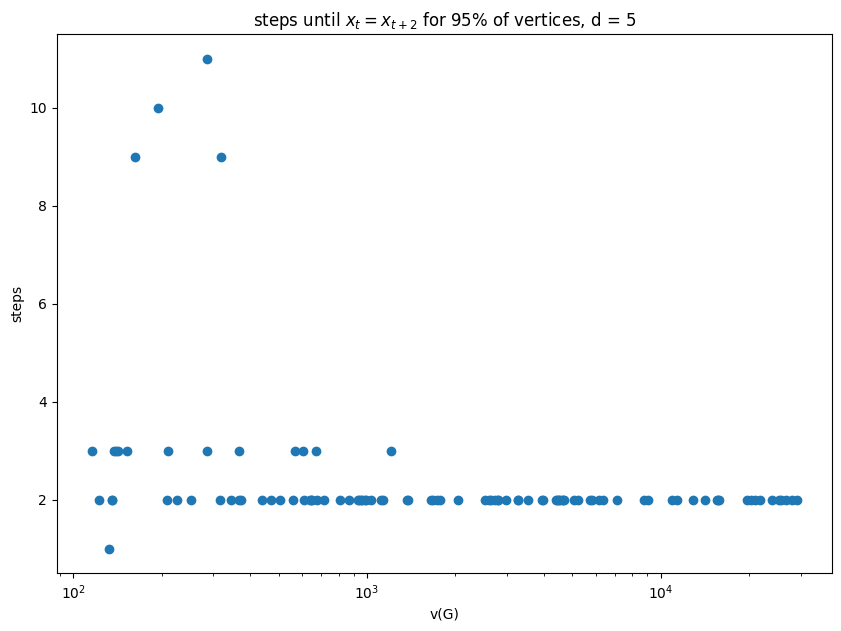

In [7]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title('steps until $x_t = x_{t+2}$ for 95% of vertices, d = ' + str(d))
plt.savefig(f'steps_until_approximately_converge_{d}.png')

In [10]:
d = 7
num_tests = 100

ns = (10 ** (2 + np.random.random(num_tests) * 2.5)).astype(int) // 2 * 2
steps = []
for n in tqdm(ns):
    graph = nx.random_regular_graph(d, n)
    steps.append(steps_until_approximately_converge(graph, 0.95))

100%|██████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.15it/s]


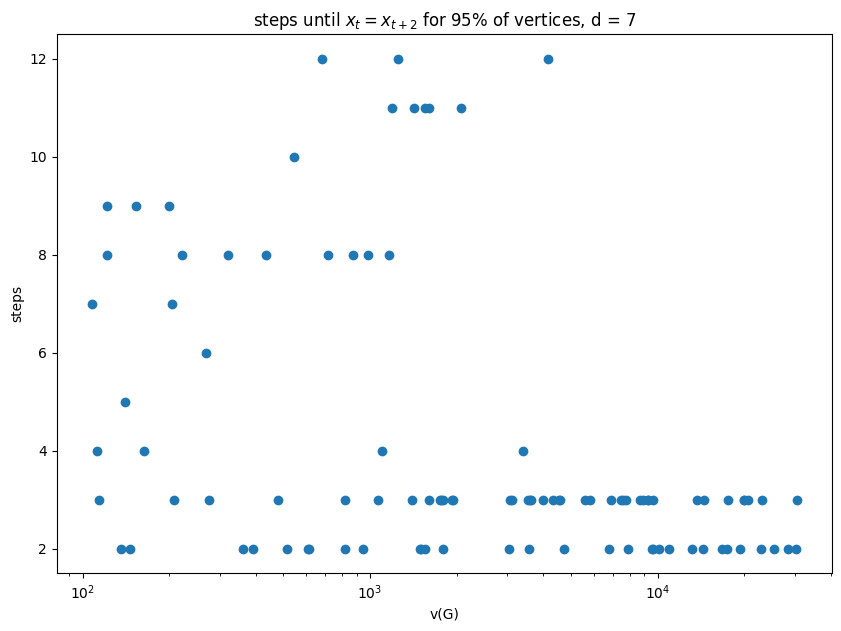

In [11]:
plt.figure(figsize=(10, 7))
# plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('steps')
plt.xscale('log')
plt.scatter(ns, steps)
plt.title('steps until $x_t = x_{t+2}$ for 95% of vertices, d = ' + str(d))
plt.savefig(f'steps_until_approximately_converge_{d}.png')

In [8]:
%%time
oscillating_fractions_er(30000, 5 / 30000, 1)

CPU times: user 41.6 s, sys: 108 ms, total: 41.7 s
Wall time: 41.7 s


[0.22616666666666665]

In [10]:
%%time
fractions = []

for d in [3, 5, 7]:
    for n in [1000, 10000, 30000]:
        print(f'n = {n}, d = {d}:')
        fractions.append(oscillating_fractions_er(n, d / n, 100 if n == 30000 else 300))
        print(fractions[-1])

n = 1000, d = 3:
[0.184, 0.182, 0.245, 0.205, 0.222, 0.229, 0.218, 0.223, 0.272, 0.199, 0.229, 0.189, 0.225, 0.192, 0.153, 0.214, 0.148, 0.188, 0.198, 0.2, 0.191, 0.18, 0.19, 0.238, 0.167, 0.226, 0.194, 0.227, 0.149, 0.205, 0.219, 0.084, 0.213, 0.263, 0.116, 0.212, 0.167, 0.103, 0.25, 0.268, 0.171, 0.223, 0.21, 0.22, 0.176, 0.222, 0.163, 0.208, 0.226, 0.268, 0.232, 0.177, 0.151, 0.186, 0.234, 0.185, 0.197, 0.201, 0.217, 0.185, 0.204, 0.202, 0.24, 0.174, 0.162, 0.199, 0.24, 0.217, 0.15, 0.206, 0.207, 0.134, 0.27, 0.217, 0.199, 0.25, 0.227, 0.185, 0.234, 0.195, 0.224, 0.211, 0.203, 0.188, 0.168, 0.196, 0.162, 0.223, 0.201, 0.138, 0.221, 0.183, 0.226, 0.189, 0.239, 0.166, 0.251, 0.235, 0.231, 0.256, 0.185, 0.211, 0.203, 0.195, 0.234, 0.172, 0.129, 0.168, 0.206, 0.233, 0.183, 0.204, 0.215, 0.237, 0.201, 0.212, 0.137, 0.259, 0.183, 0.213, 0.26, 0.172, 0.187, 0.195, 0.165, 0.197, 0.219, 0.189, 0.175, 0.154, 0.189, 0.204, 0.228, 0.201, 0.214, 0.189, 0.184, 0.228, 0.208, 0.174, 0.229, 0.187, 0

In [11]:
out_file = open("fractions_er.json", "w") 
json.dump(fractions, out_file) 
out_file.close() 

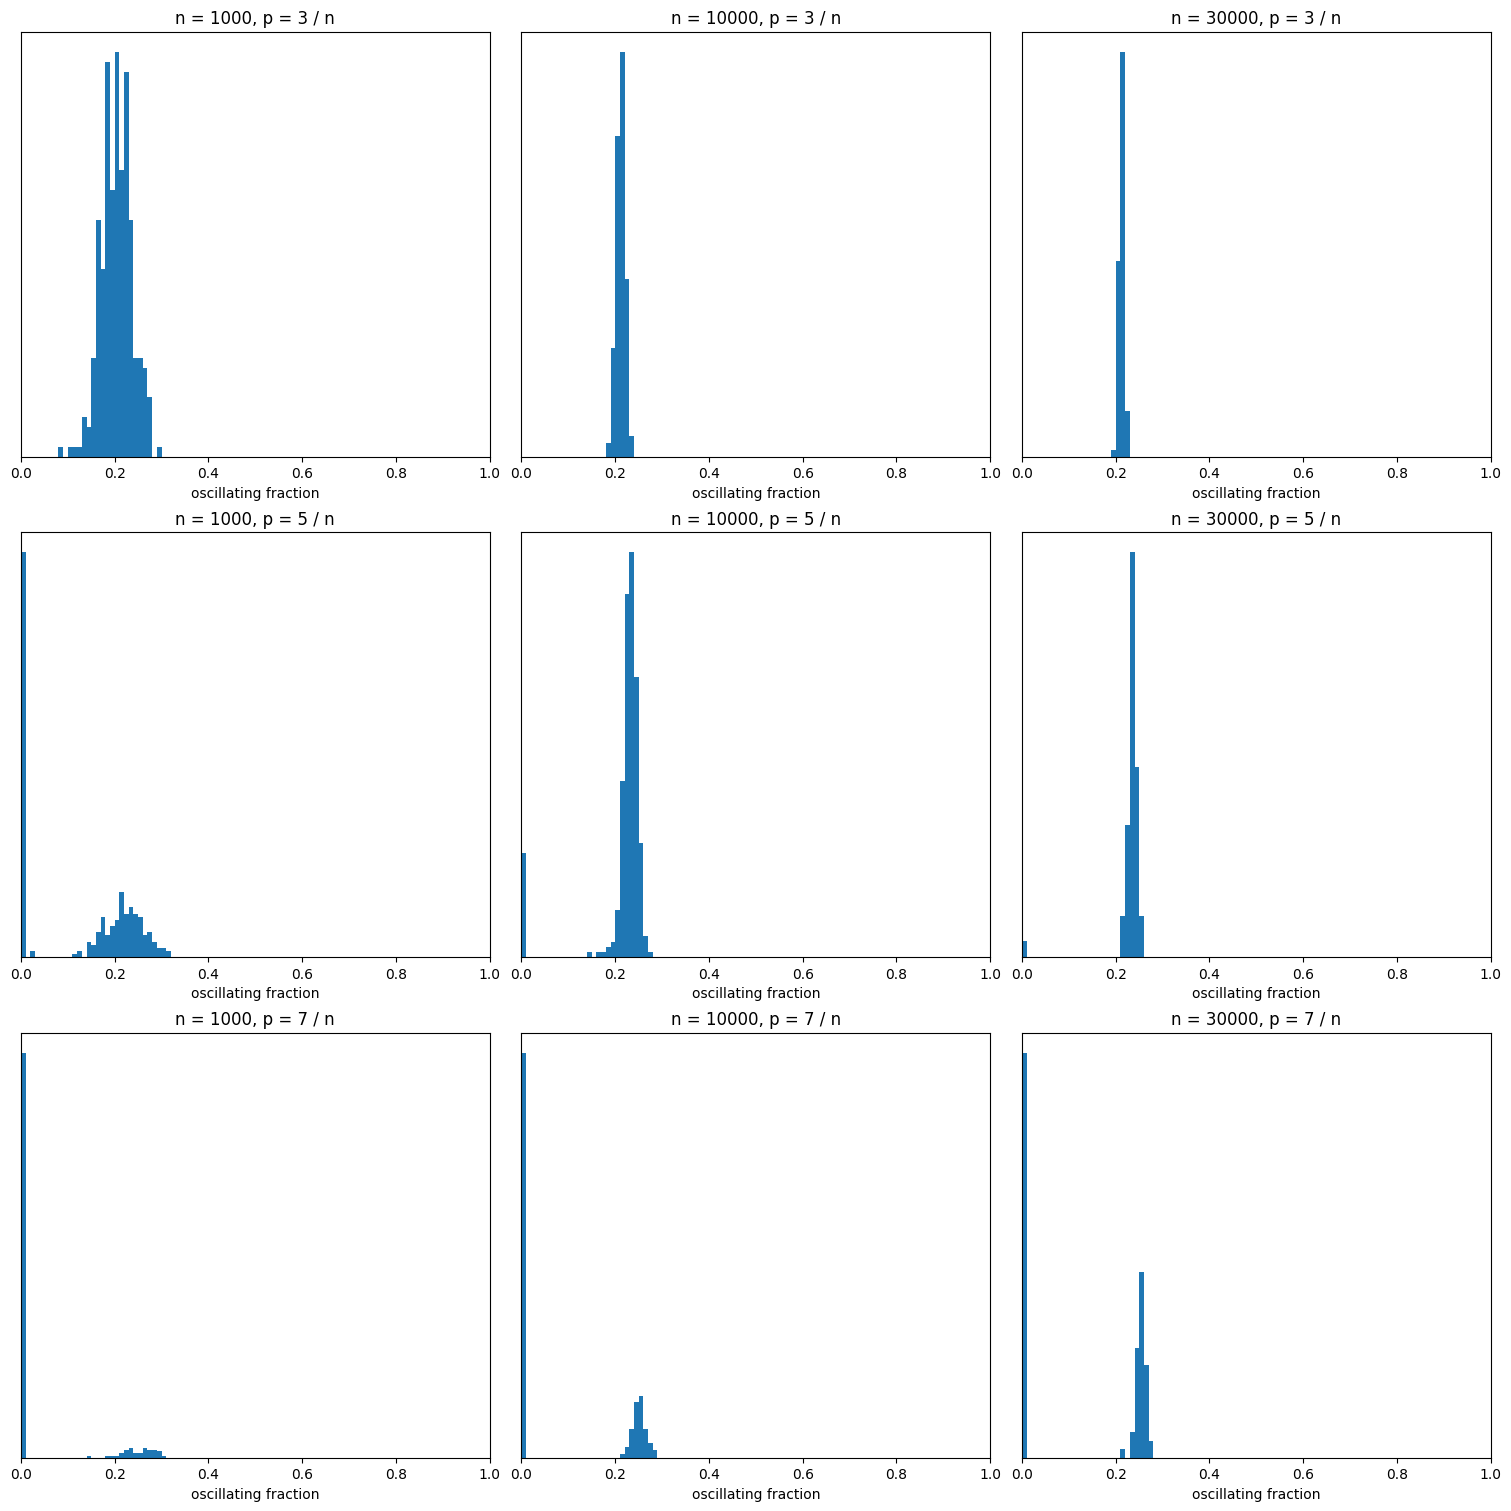

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)

for i, d in enumerate([3, 5, 7]):
    for j, n in enumerate([1000, 10000, 30000]):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.xlim(0, 1)
        plt.xlabel('oscillating fraction')
        plt.yticks([])
        plt.hist(fractions[i * 3 + j], bins=100, range=(0, 1))
        plt.title(f'n = {n}, p = {d} / n')

plt.savefig(f'histograms_er.png')

CPU times: user 2.24 s, sys: 179 ms, total: 2.42 s
Wall time: 2.21 s


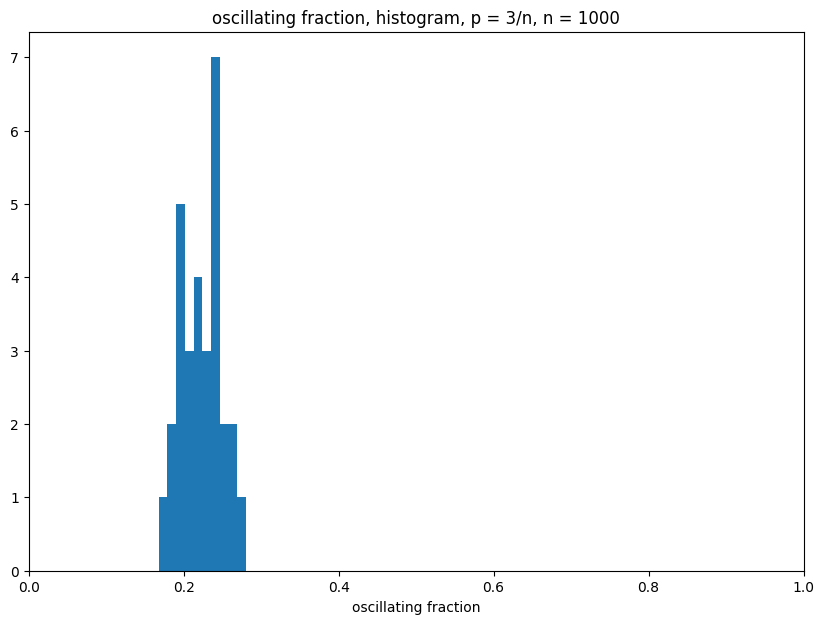

In [3]:
%%time

num_vxs = 1000
p = 3

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 30)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

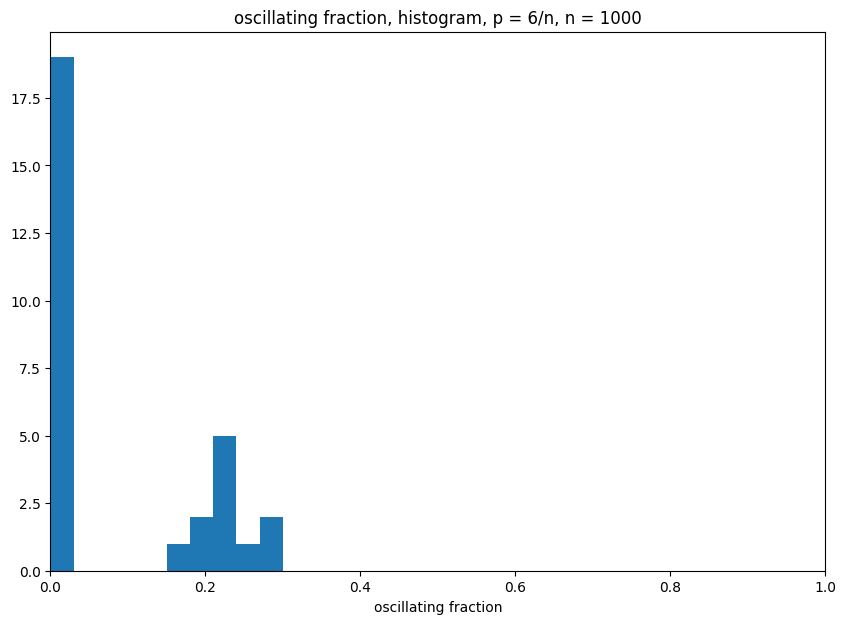

In [11]:
num_vxs = 1000
p = 6

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 30)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

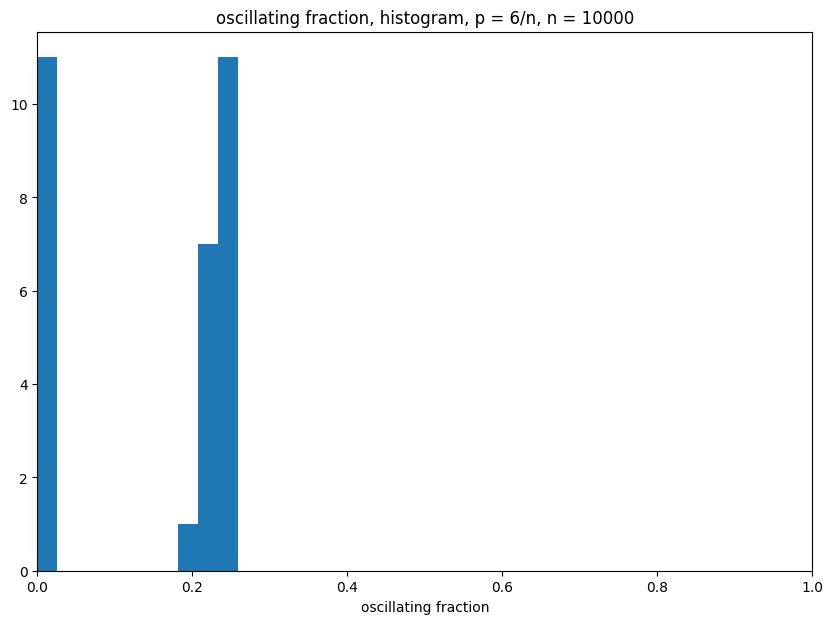

In [12]:
num_vxs = 10000
p = 6

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 30)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

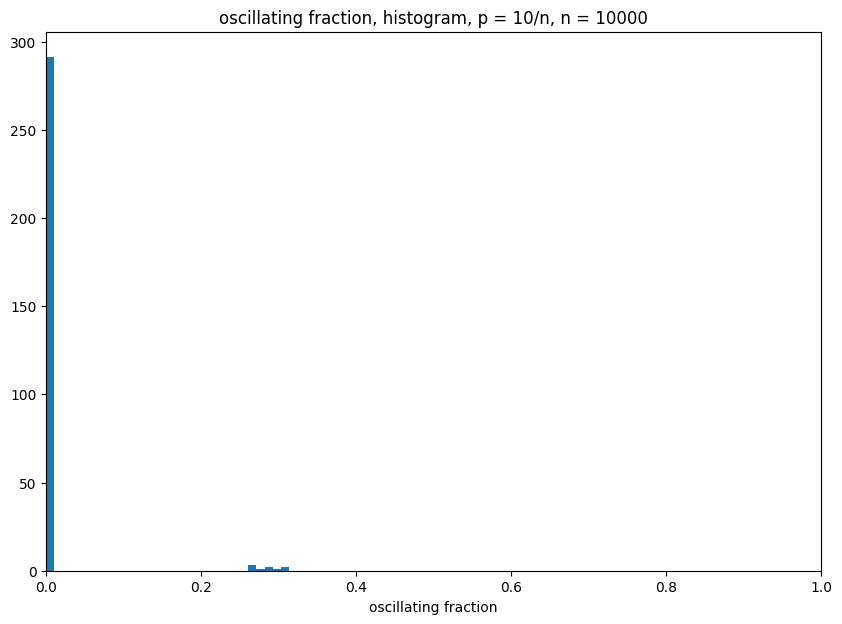

In [14]:
num_vxs = 10000
p = 10

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 300)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

CPU times: user 8min 15s, sys: 2.56 s, total: 8min 18s
Wall time: 8min 18s


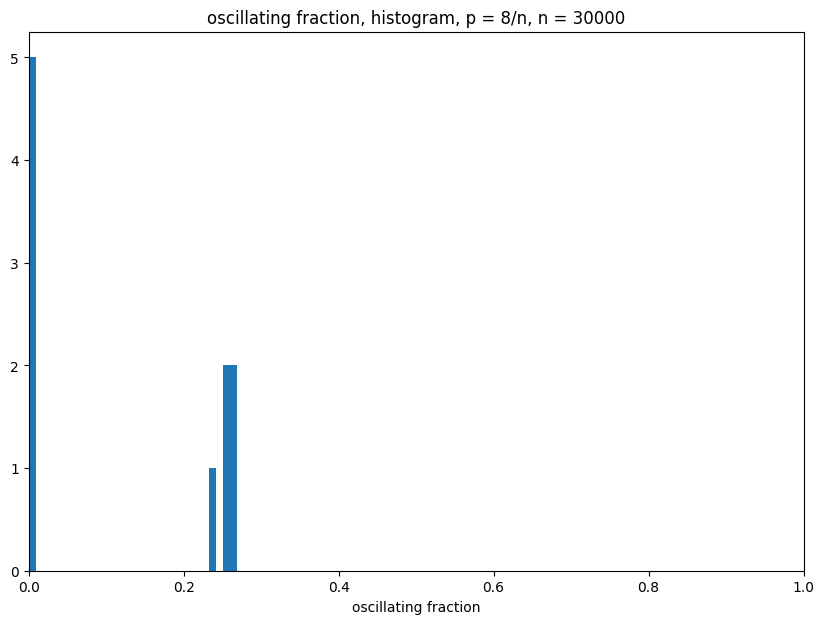

In [9]:
%%time

num_vxs = 30000
p = 8

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 10)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

CPU times: user 1h 13min 25s, sys: 19.6 s, total: 1h 13min 45s
Wall time: 1h 13min 44s


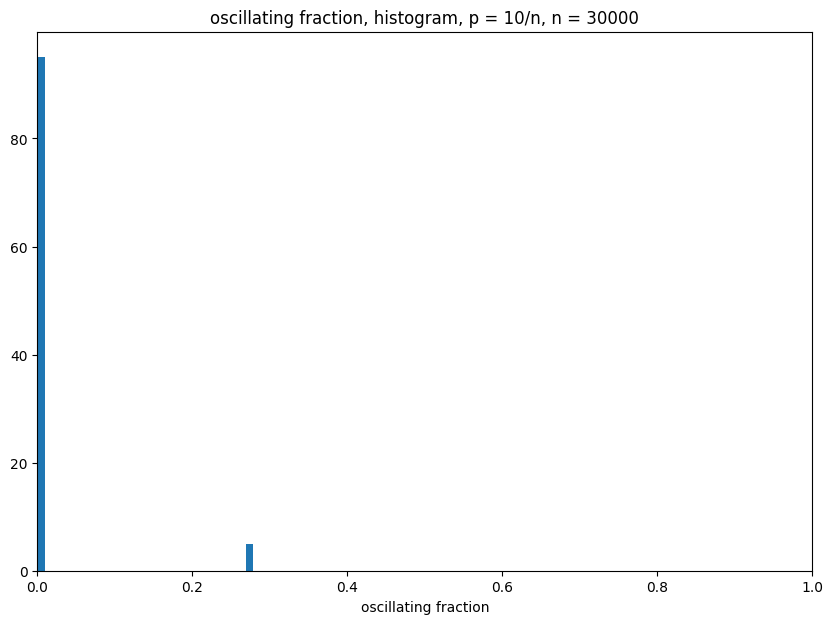

In [13]:
%%time

num_vxs = 30000
p = 10

fractions = oscillating_fractions_er(num_vxs, p / num_vxs, 100)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('oscillating fraction')
# plt.ylabel('probability')
plt.hist(fractions, bins=30)
plt.title(f'oscillating fraction, histogram, p = {p}/n, n = {num_vxs}')
plt.savefig(f'oscillating_hist_er_{p}_{num_vxs}.png')

100%|████████████████████████████████████████████████████████████████| 30/30 [00:25<00:00,  1.16it/s]


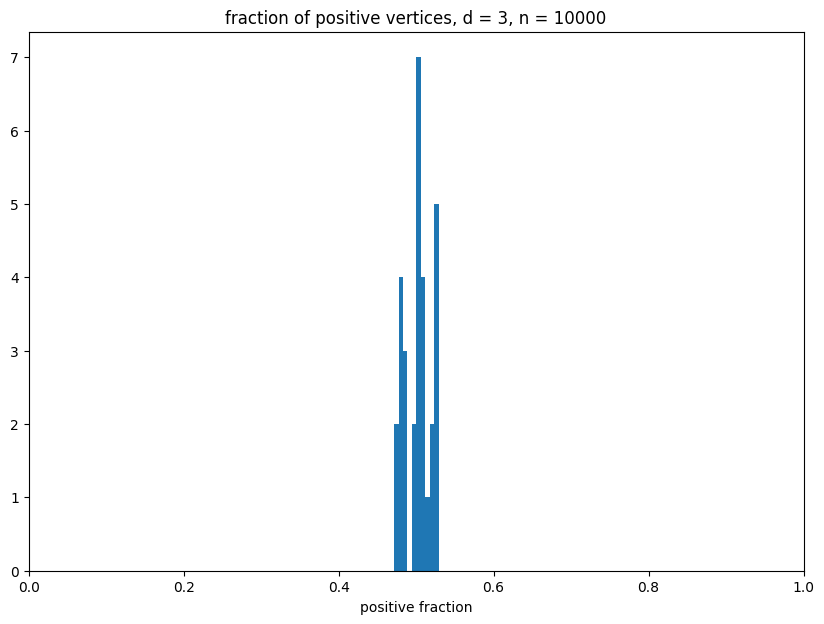

In [9]:
d = 3
num_vxs = 10000
iters = 30

fractions = []

for i in tqdm(range(iters)):
    graph = nx.random_regular_graph(d, num_vxs)
    _, cut = swap_process(graph, return_cut=True)
    fractions.append((num_vxs + np.sum(cut)) / 2 / num_vxs)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('positive fraction')
plt.hist(fractions)
plt.title(f'fraction of positive vertices, d = {d}, n = {num_vxs}')
plt.savefig(f'positive_fraction_{d}_{num_vxs}.png')

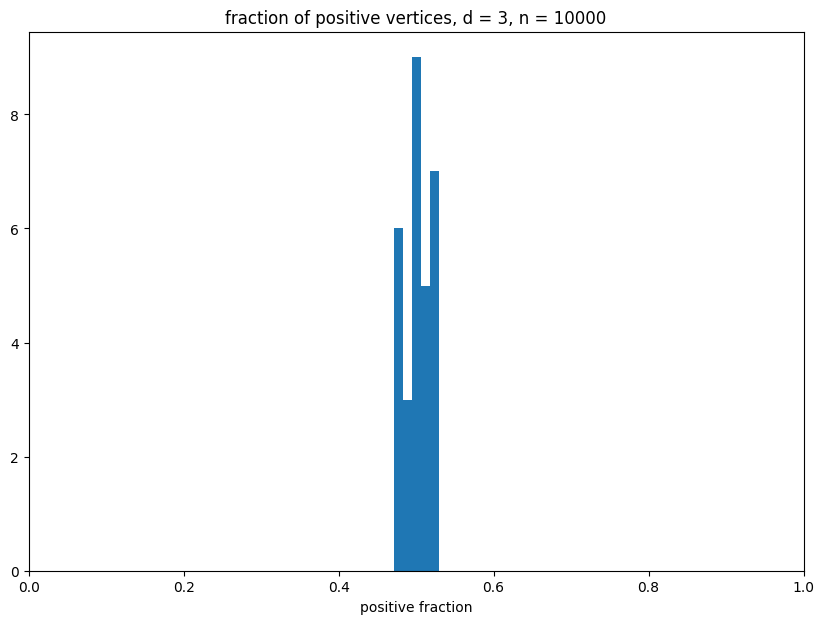

In [11]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('positive fraction')
plt.hist(fractions, bins=5)
plt.title(f'fraction of positive vertices, d = {d}, n = {num_vxs}')
plt.savefig(f'positive_fraction_{d}_{num_vxs}.png')

100%|████████████████████████████████████████████████████████████████| 30/30 [00:29<00:00,  1.01it/s]


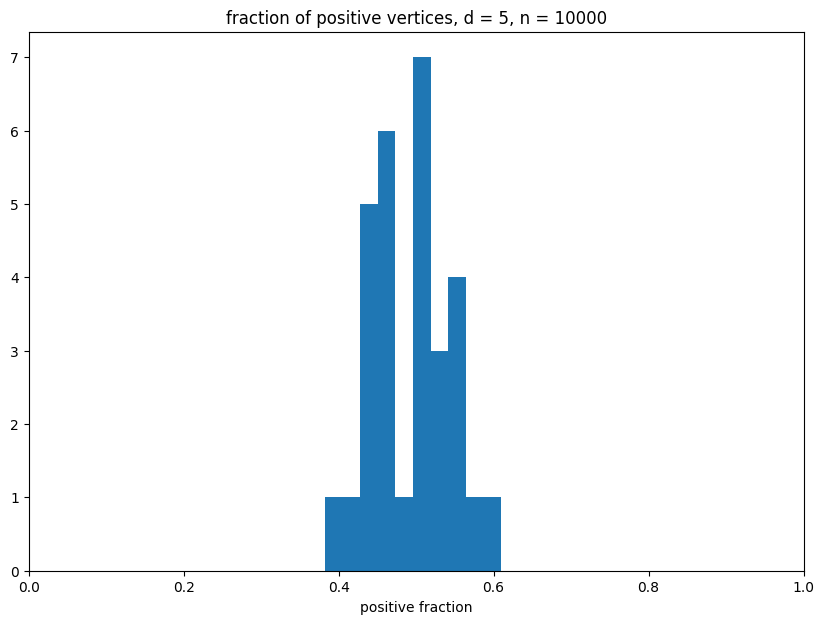

In [12]:
d = 5
num_vxs = 10000
iters = 30

fractions = []

for i in tqdm(range(iters)):
    graph = nx.random_regular_graph(d, num_vxs)
    _, cut = swap_process(graph, return_cut=True)
    fractions.append((num_vxs + np.sum(cut)) / 2 / num_vxs)

plt.figure(figsize=(10, 7))
plt.xlim(0, 1)
plt.xlabel('positive fraction')
plt.hist(fractions)
plt.title(f'fraction of positive vertices, d = {d}, n = {num_vxs}')
plt.savefig(f'positive_fraction_{d}_{num_vxs}.png')

In [10]:
def tree_depth_2(d):
    # returns a tree of depth 2, every vertex has degree d except for leaves
    # root has index 0, its children are 1 through d
    tree = nx.Graph()
    tree.add_nodes_from(range(d * d + 1))
    tree.add_edges_from([(0, i) for i in range(1, d + 1)])
    tree.add_edges_from([(i, i * (d - 1) + 2 + j) for i in range(1, d + 1) for j in range(d - 1)])
    return tree

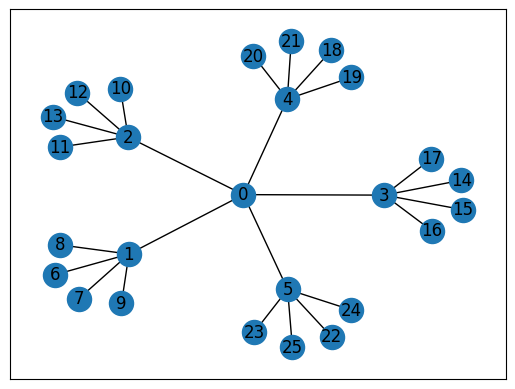

In [20]:
tree = tree_depth_2(5)
nx.draw_networkx(tree)

In [38]:
cut = final_cuts[179]
print(cut)
print(cut[1:d + 1])
np.sum(np.abs(cut[1:d + 1] - cut[0])) // 2

[-1  1 -1  1 -1 -1  1  1 -1 -1]
[ 1 -1  1]


2

In [42]:
d = 3
tree = tree_depth_2(d)

initial_cuts = np.array([[1] + list(l) for l in itertools.product([-1, 1], repeat=d * d)])
final_cuts = [majority_dynamics_step(tree, cut) for cut in initial_cuts]

num_reds = np.zeros(d + 1).astype(int)
for cut in final_cuts:
    reds = np.sum(np.abs(cut[1:d + 1] - cut[0])) // 2
    num_reds[reds] += 1

print(num_reds)
probas = num_reds / np.sum(num_reds)
print(probas)
probas[1] * 2 / 3 + probas[2] + probas[3]

[112 144 144 112]
[0.21875 0.28125 0.28125 0.21875]


0.6875

In [7]:
def number_to_cut(number, length):
    bits = [int(digit) for digit in bin(number)[2:]]
    if len(bits) < length:
        bits = [0] * (length - len(bits)) + bits
        
    return np.array([-1 if c == 0 else 1 for c in bits])

In [12]:
d = 5
tree = tree_depth_2(d)

num_reds = np.zeros(d + 1).astype(int)
for number in tqdm(range(2 ** (d * d))):
    cut = number_to_cut(number, d * d + 1)
    cut = majority_dynamics_step(tree, cut)
    reds = np.sum(np.abs(cut[1:d + 1] - cut[0])) // 2
    num_reds[reds] += 1    

print(num_reds)
probas = num_reds / np.sum(num_reds)
print(probas)

100%|████████████████████████████████████████████████| 33554432/33554432 [2:11:59<00:00, 4236.68it/s]

[2626816 6406400 7744000 7744000 6406400 2626816]
[0.07828522 0.1909256  0.23078918 0.23078918 0.1909256  0.07828522]


In [90]:
def unsat_core_probability(d, num_vxs, num_dyn_steps, num_tests):
    if d % 2 == 0:
        raise RuntimeError('d has to be odd')
        
    num_successes = 0

    for i in range(num_tests):
        graph = nx.random_regular_graph(d, num_vxs)
        
        cut = np.random.choice([1, -1], size=num_vxs)
        for j in range(num_dyn_steps):
            cut = majority_dynamics_step(graph, cut)

        adj_matrix = nx.adjacency_matrix(graph, nodelist=range(num_vxs))
        unsat_cut = clip(- (adj_matrix @ cut) * cut)
            
        if is_core_in_positive_part(graph, unsat_cut):
            num_successes += 1

    return num_successes / num_tests

100%|████████████████████████████████████████████████████████████████| 15/15 [00:44<00:00,  2.95s/it]


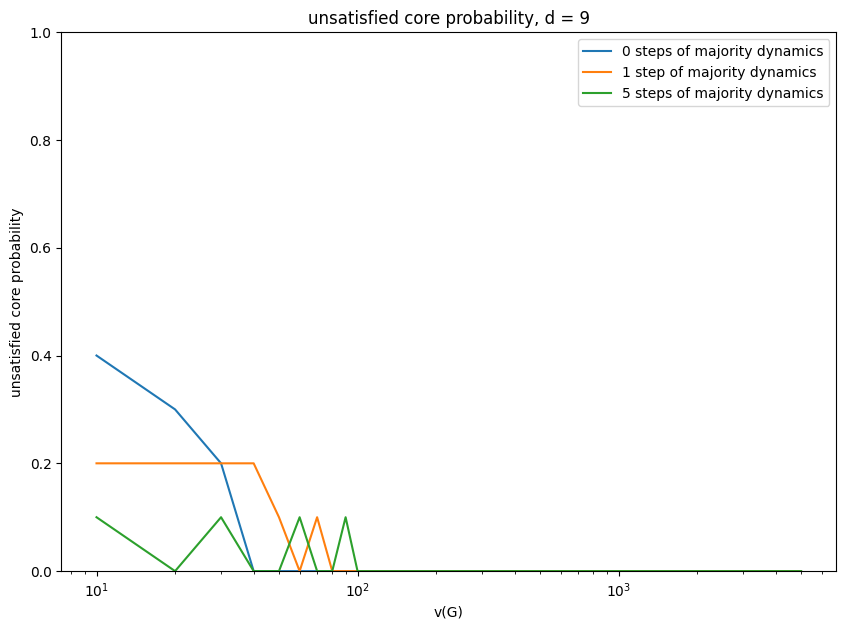

In [93]:
d = 9
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas_0 = []
probas_1 = []
probas_5 = []
num_tests = 10

for size in tqdm(sizes):
    probas_0.append(unsat_core_probability(d, size, 0, num_tests))
    probas_1.append(unsat_core_probability(d, size, 1, num_tests))
    probas_5.append(unsat_core_probability(d, size, 5, num_tests))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('unsatisfied core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of majority dynamics')
plt.plot(sizes, probas_1, label='1 step of majority dynamics')
plt.plot(sizes, probas_5, label='5 steps of majority dynamics')
plt.title(f'unsatisfied core probability, d = {d}')
plt.legend();
plt.savefig(f'proba_unsat_core_{d}.png')

In [104]:
def weird_dynamics_step(graph, cut):
    num_vxs = graph.number_of_nodes()
    adj_matrix = nx.adjacency_matrix(graph, nodelist=range(num_vxs))

    cut_copy = cut.copy() # don't want to change the cut itself
    cut_copy = clip(- (adj_matrix @ cut) * cut)
    return cut_copy

In [105]:
def weird_core_probability(d, num_vxs, num_dyn_steps, num_tests):
        
    num_successes = 0

    for i in range(num_tests):
        graph = nx.random_regular_graph(d, num_vxs)
        
        cut = np.random.choice([1, -1], size=num_vxs)
        for j in range(num_dyn_steps):
            cut = weird_dynamics_step(graph, cut)
            
        if is_core_in_positive_part(graph, cut):
            num_successes += 1

    return num_successes / num_tests

100%|████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.86it/s]


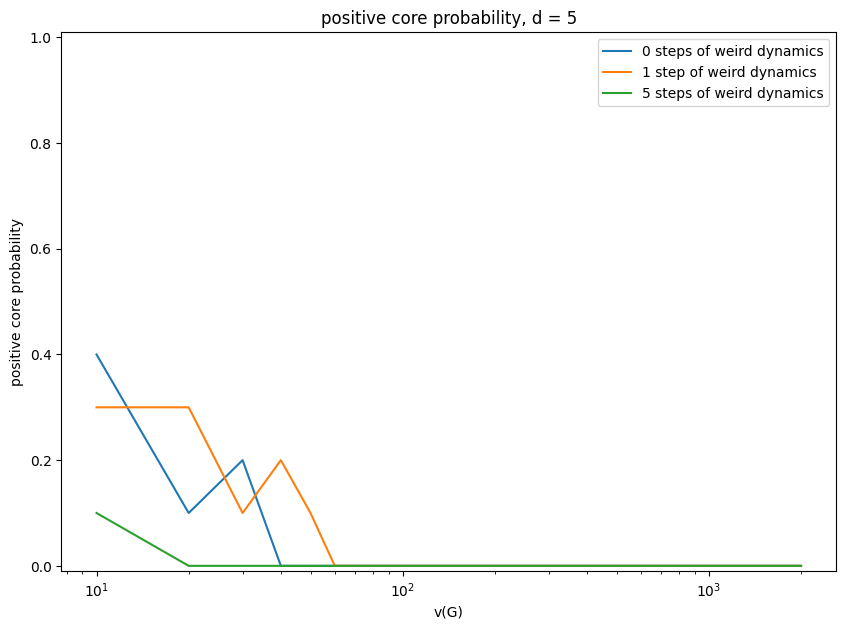

In [107]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 2001, 1000)))

probas_0 = []
probas_1 = []
probas_5 = []
num_tests = 10

for size in tqdm(sizes):
    probas_0.append(weird_core_probability(d, size, 0, num_tests))
    probas_1.append(weird_core_probability(d, size, 1, num_tests))
    probas_5.append(weird_core_probability(d, size, 5, num_tests))

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('positive core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of weird dynamics')
plt.plot(sizes, probas_1, label='1 step of weird dynamics')
plt.plot(sizes, probas_5, label='5 steps of weird dynamics')
plt.title(f'positive core probability, d = {d}')
plt.legend();
# plt.savefig(f'proba_weird_core_{d}.png')

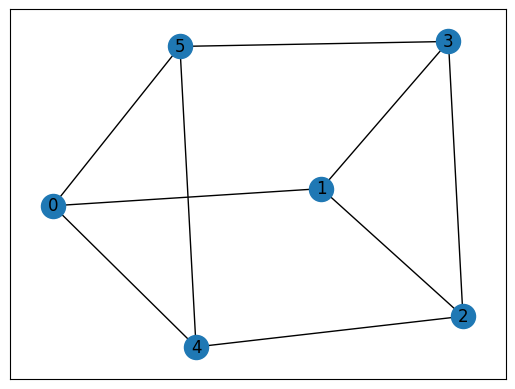

In [10]:
d = 3
num_vxs = 6

graph = nx.random_regular_graph(d, num_vxs)
nx.draw_networkx(graph)